# Getting chat data from json format

The chat data will be in json format
```
data : {[converation_id: "   "
         conversation : {[text : "   "
                          side : "   "
                          timestamp : "   " #in miliseconds
                          sentiment : "   " #floating score in -1 to 1
                          emotion : {[em1 : "   "
                                      em2 : "   "
                                      
                                     ]
                                    }
                         ]
                        }
        ],
        [
        
        ]
       }
```

In [63]:
import numpy as np
import tensorflow as tf
import re
from collections import Counter
import json
from pprint import pprint

In [64]:
sentence = []
score = []

abs_score = []
abs_sentence = []

In [88]:
def preprocess(text):
    
    # Replace punctuation with tokens so we can use them in our model
    text = text.lower()
#     text = text.replace('.', ' . ')
#     text = text.replace(',', ' , ')
#     text = text.replace('"', ' " ')
#     text = text.replace(';', ' ; ')
#     text = text.replace('!', ' ! ')
#     text = text.replace('?', ' ? ')
#     text = text.replace('(', ' ( ')
#     text = text.replace(')', ' ) ')
#     text = text.replace('--', ' -- ')
#     text = text.replace('<br />', ' <PERIOD> ')
#     text = text.replace('\\', ' <PERIOD> ')
#     # text = text.replace('\n', ' <NEW_LINE> ')
#     text = text.replace(':', ' <PERIOD> ')
#     text = text.replace(' <PERIOD> ', ' ')
#     words = text.split()
    
    return text


In [89]:
with open('beam_cable_google_tagged_data.json') as data_file:
    data1 = json.load(data_file)
with open('droom_google_tagged_data.json') as data_file:
    data2 = json.load(data_file)
for d in data1['data']:
    conversation = d['conversation']
    c_id = d['conversation_id']
    for c in conversation:
        sentiment = float(c['sentiment'])
        abs_score.append(sentiment)
        sentiment = -1 if (sentiment < 0) else 1
        dialogue = preprocess(c['text'])
        sentence.append(dialogue)
        score.append(sentiment)

for d in data2['data']:
    conversation = d['conversation']
    c_id = d['conversation_id']
    for c in conversation:
        sentiment = float(c['sentiment'])
        abs_score.append(sentiment)
        sentiment = -1 if (sentiment < 0) else 1
        dialogue = preprocess(c['text'])
        sentence.append(dialogue)
        score.append(sentiment)

        
abs_sentence = sentence

In [90]:
sentence

['for shifting connection',
 'hey i got it up now',
 "i need to escalate the issue any number or mail id .  . i don't want this template s entences",
 'good morning !  welcome to act fibernet .  my name is swathi ,  how may i assist you? ',
 'sorry to inform you this is not the registered user id',
 'we request you to check with the customer care team of bangalore the number are  080-40408400 ,  080-4284 0000',
 'hi neelam',
 'sure',
 'are you there? ',
 'ok but what is the customer care number? ',
 'as i had connection about 2 to 3 yrs ago',
 'a/c noumber: 101006086108',
 'after fixing the issue i will give upgrade request',
 'one more interesting thing is 3 of them work for tv channels .  .  .  . they want to give the feedback and the signed copies so that people will get awareness about the services of act',
 'i have already shifted',
 'ok',
 'and what are all documents required for new connection  ? ',
 'good morning mr . suresh',
 'may i know the alternate number ? ',
 'they call 

In [91]:
from random import shuffle
data = list(zip(sentence, score))
shuffle(data)

sentence = [ item[0] for item in data]
score = [ item[1] for item in data]

In [92]:
features = sentence
labels = score

split_frac = 0.6
split_idx = int(len(features)*split_frac)
train_x, val_x = features[:split_idx], features[split_idx:]
train_y, val_y = labels[:split_idx], labels[split_idx:]

test_idx = int(len(val_x)*0.5)
val_x, test_x = val_x[:test_idx], val_x[test_idx:]
val_y, test_y = val_y[:test_idx], val_y[test_idx:]




In [93]:
train_x[0]

'can you brief me about a-max 650'

In [94]:
all_train_msgs = len(train_x)
set_train = set(train_x)

print('training msgs len - ', all_train_msgs)
print('unique training msgs -', len(set_train))

words_train = []

for msg in train_x:
    this_msg = msg.split(' ')
    words_train.extend(this_msg)
    
set_train_words = set(words_train)
print('vocabulary of train -', len(set_train_words))

training msgs len -  1332925
unique training msgs - 249604
vocabulary of train - 73836


In [95]:
all_valid_msgs = len(val_x)
set_valid = set(val_x)

valid_intersection_train = set_train & set_valid

valid_diff_train = set_valid - set_train

print('total valid msgs -', all_valid_msgs)
print('unique valid msgs -',len(set_valid))
print('unique msgs common in train -', len(valid_intersection_train))
print('unique msgs not in train -',len(valid_diff_train))

words_valid = []

for msg in val_x:
    this_msg = msg.split(' ')
    words_valid.extend(this_msg)
    
set_valid_words = set(words_valid)
print('vocabulary of valid -', len(set_valid_words))
print('vocab common with train -', len(set_valid_words & set_train_words))
print('vocab different from train -', len(set_valid_words - set_train_words))

total valid msgs - 444308
unique valid msgs - 157468
unique msgs common in train - 144458
unique msgs not in train - 13010
vocabulary of valid - 53855
vocab common with train - 51490
vocab different from train - 2365


In [96]:
all_test_msgs = len(test_x)
set_test = set(test_x)

test_intersec_train = set_train & set_test
test_intersec_valid = set_valid & set_test
test_intersec_train_valid = set_valid & (set_test | set_train)

print('total test msgs -', all_test_msgs)
print('total unique test msgs -', len(set_test))
print('unique test msgs common with train -', len(test_intersec_train))
print('unique test msgs common with valid -', len(test_intersec_valid))
print('unique test msgs common with train union valid -', len(test_intersec_train_valid))

print('unique test msgs not in train -', len(set_test) - len(test_intersec_train))
print('unique test msgs not in valid -', len(set_test) - len(test_intersec_valid))
print('unique test msgs not in train union valid -', len(set_test) - len(test_intersec_train_valid))


words_test = []

for msg in test_x:
    this_msg = msg.split(' ')
    words_test.extend(this_msg)
    
set_test_words = set(words_test)
print('vocabulary of test -', len(set_test_words))
print('vocab common with train -', len(set_test_words & set_train_words))
print('vocab different from train -', len(set_test_words - set_train_words))
print('vocab common with valid -', len(set_test_words & set_valid_words))
print('vocab different from valid -', len(set_test_words - set_valid_words))
print('vocab common with train and valid-', len(set_test_words & (set_train_words | set_valid_words)))
print('vocab different from train union valid-', len(set_test_words - (set_train_words | set_valid_words)))

total test msgs - 444309
total unique test msgs - 157108
unique test msgs common with train - 144095
unique test msgs common with valid - 93416
unique test msgs common with train union valid - 153179
unique test msgs not in train - 13013
unique test msgs not in valid - 63692
unique test msgs not in train union valid - 3929
vocabulary of test - 53541
vocab common with train - 51222
vocab different from train - 2319
vocab common with valid - 39314
vocab different from valid - 14227
vocab common with train and valid- 52839
vocab different from train union valid- 702


In [97]:
print(train_x[100].split(' '))
print(train_x[100])

['ook']
ook


In [98]:
from collections import Counter

In [99]:
train_words_count = Counter(words_train)
train_sorted_vocab = sorted(train_words_count, key = train_words_count.get, reverse = True)

for word in train_sorted_vocab:
    print(word, train_words_count[word])

 681963
the 480099
i 356422
you 322832
to 268281
. 241839
is 215259
for 150759
my 133728
will 122644
and 120242
, 115355
may 114182
a 110762
? 107897
in 106647
we 106378
have 96510
your 91841
of 90594
are 83776
can 82031
know 78013
me 74196
that 72999
good 72789
how 69596
team 69164
name 66787
not 64188
connection 63797
it 62935
please 61983
number 60289
request 59935
) 58806
with 58292
do 57224
as 56593
provide 54764
( 54663
thank 54477
assist 54387
act 53703
our 53118
mobile 52434
ok 51349
need 46600
account 43863
check 43099
time 42998
registered 42429
call 42293
no 40615
from 40239
details 40136
sorry 39726
am 39152
this 38954
there 38710
so 38649
if 37740
pay 36898
plan 36751
on 36742
be 36574
or 35839
yes 33933
! 32767
issue 32514
what 31551
fiber 30975
new 30589
hi 30567
ticket 29843
charges 29738
you? 29588
u 29468
area 28767
sure 28269
after 27864
now 27383
welcome 26938
but 26631
which 26085
afternoon 25719
let 25470
once 25428
installation 25408
chat 24770
net 24625
2 24328


hii 385
care- 384
proper 383
apply 382
9th 382
nope 382
thr 382
alright 382
ll 381
during 380
order 380
hv 378
lease 377
hell 376
face 375
added 375
passport 375
detail 375
hav 375
credentials 374
waste 374
went 374
clcik 372
heard 371
banjara 371
code 370
frequent 370
apartments 370
contacting 370
yup 370
samala: 370
application 369
615 368
land 368
nelam 367
2657/- 367
hence 366
hathway 364
heavy 364
level 364
light 364
leased 363
valid 363
wht 363
vouchers 363
disconnected. 362
opened 360
staying 360
userid 360
properly 359
thnx 359
size 358
opposite 357
difference 356
guide 356
router? 355
ru 355
bases 354
27 354
ravi 352
everytime 351
known 351
running 351
sometime 351
port 350
frm 350
looks 350
changes 349
hyderabad, 349
1180 349
suppose 349
bt 346
cc 346
expired 345
5th 345
kiran 345
der? 345
package/plan 343
999 343
additional 343
small 343
isp 340
myself 340
notice 340
toll 340
permanent 339
though 339
rain 338
/- 338
mobile: 338
trouble 338
band 337
outside 337
ac 335
mac 335

convergence 103
ee 103
conn 103
04442840000 103
tariffs 103
fees 103
displaying 103
service? 103
mohd 103
500072 103
hurry 103
enquire 103
regd 103
adjust 103
senior 103
lodged 103
page-portal 103
vivekananda 103
guntur 103
filled 103
experiencing 103
registration 103
thnk 102
prashanth 102
17th 102
discussed 102
bagh 102
alot 102
finish 102
installtion 102
need? 101
3-4 101
settings 101
ell 101
desktop 101
ir 101
tommorow 101
username: 101
99 100
21st 100
number. 100
whose 100
report 100
became 100
serilingampally 100
narayana 100
files 100
marketing 100
raghu 100
enjoy 100
complex 100
showroom 100
program 100
tonight 100
exist 100
downloads 100
ake 99
wires 99
working? 99
common 99
swach 99
15-nov-15 99
terms 99
advise 99
statements 99
tc 99
,1- 99
relocate 99
particular 99
orking 99
so? 99
attended 98
1month 98
diamond 98
icici 98
circle 98
clicking 98
3months 98
mob: 98
regularly 98
2708 98
storms. 98
degrade 98
puram 98
deduct 98
scheme 98
also? 97
http://www.actcorp.in/paybill 97

wallet 50
help? 50
conenction 50
meadows 50
blore 50
surprised 50
imran 50
helllo 50
hotspot 50
madhapur, 50
[15:46] 50
mbl 50
9985607997 50
erragadda 50
500048 50
rmn 50
miyapur, 50
connnection 50
care? 50
payment, 50
especially 50
botanical 50
correctly 50
narasimharao 50
them? 49
house, 49
ship 49
clicked 49
service, 49
3575/- 49
acccount 49
followup 49
bengaluru 49
impacting 49
annoying 49
portal? 49
madhavi 49
ok' 49
1week 49
account: 49
650rs 49
highest 49
champapet 49
orange 49
respond? 49
http://www.actcorp.in/paybill,e-seva 49
(eseva 49
tower 49
11798/-including 49
loyal 49
continuous 49
prasanna 49
alt 49
78 49
/usage 49
industrial 49
meerpet 49
response? 49
-999 49
balajinagar 49
mayuri 49
villa 49
balance: 49
pelase 49
anted 49
nr 49
costly 49
too? 49
anil: 49
therer 49
communicate 48
'the 48
:0 48
okay! 48
2hrs 48
lock 48
you* 48
nline 48
information? 48
wana 48
em 48
pasting 48
not, 48
count 48
sir, 48
:p 48
unlimited? 48
quthbullapur 48
plaza 48
upfront 48
indore 48
jaga

felt 32
issue.. 32
care. 32
inorder 32
taht 32
eluru 32
ststic 32
exemption 32
093 32
hyd? 32
yester 32
account----> 32
aruna 32
yet? 32
[14:27] 32
hasn't 31
hrs? 31
anyone? 31
leader 31
20mpbs 31
followed 31
connecte 31
barkatpura 31
allows 31
trai 31
ment 31
exhausted 31
nit 31
zubair 31
hema 31
rethibowli 31
odisha 31
recurring 31
corresponding 31
trail 31
401, 31
purchasing 31
catch 31
500045 31
tak 31
acting 31
message. 31
tranfer 31
4093/-including 31
saket 31
500062 31
throw 31
unpluged 31
username? 31
probs 31
method 31
digits 31
thanks... 31
wrk 31
dats 31
xecutive 31
revise 31
pinging 31
2000 31
lies 31
vening 31
pioneer 31
cards 31
prioritize 31
rajasekhar 31
archana 31
saurav 31
location. 31
rahman 31
600/- 31
strength 31
typ 31
infront 31
saving 31
blink 31
nirmal 31
??????? 31
sateesh 31
express 31
forever 31
sincerely 31
?????? 31
reviews 31
selling 31
aking 31
kya 31
esponse 31
h.no: 31
max650 31
chikkadpally 31
nagesh 31
antivirus 31
unnecessary 31
h-no 31
98 31
photon

9618463746 23
affects 23
needfu 23
accunt 23
744/-including 23
erro 23
locked 23
prb 23
der??? 23
detaiils 23
charged? 23
team's 23
conveyed 23
gowthami 23
tellapur 23
480 23
farm 23
rs.300/- 23
okay* 23
good, 23
weaver 23
2) 23
relation 23
haha 23
narapally 23
boards 23
4093/-rs 23
becasue 23
wouldn't 23
crp 23
number... 23
interface 23
nayak 23
breakdown 23
9866045952 23
replacement 23
rcvd 23
ed 23
once? 23
internet.. 23
fortune 23
9000300984 23
pay. 23
troubling 22
dasu 22
8985373384 22
04067293232 22
rajajinagar 22
ambedkar 22
socket 22
ratna 22
setup? 22
becomes 22
1pm 22
sultana 22
p&t 22
yellareddy 22
8088641144 22
great, 22
avaialble 22
recevied 22
identify 22
101007903277 22
76 22
9885658383 22
bond 22
years. 22
only.. 22
wiil 22
sane 22
der?? 22
9949949246 22
money? 22
siddipet 22
torture 22
availabe 22
shareef 22
disrupted 22
slowly 22
mp 22
falls 22
105 22
stories 22
yesterdays 22
7893468180 22
30-40 22
9290251113 22
noor 22
nawaz 22
2800 22
underground 22
adjusting 22
640

billdesk 18
ost 18
assam 18
mayank 18
[14:26] 18
nri 18
krushi 18
coustomer 18
expand 18
existed 18
thro 18
9701165550 18
season 18
chalo 18
9000772322 17
422911 17
indus 17
crest 17
ex 17
suit 17
feroz 17
accross 17
rs.337/- 17
unplug 17
irritate 17
reception 17
denied 17
wifii 17
61 17
clarifications 17
111 17
550/-rs 17
8885913795 17
rps 17
is* 17
anilkumarreddy44@gmail 17
kumar, 17
installments 17
on't 17
postponed 17
nihar 17
9618881829 17
himayath 17
acces 17
acn 17
mansoorabad 17
ta 17
appriciate 17
inconvenient 17
operators 17
vi 17
15-20 17
vanastalipuram 17
302, 17
lame 17
wots 17
cable. 17
use. 17
worthless 17
po 17
9885740651 17
activation? 17
panigrahi 17
dispatch 17
sms. 17
500029 17
nanish 17
riyaz 17
nagar. 17
rameshs30@yahoo 17
money.. 17
12/05/2015 17
fluctuating 17
heloooo 17
olve 17
dev 17
shivalayam 17
agara 17
immediatley 17
eeseva 17
20mbs 17
bommakanti 17
2660 17
g2 17
triveni 17
shirdi 17
beg 17
rotor 17
sha 17
prime 17
vey 17
terribly 17
9441700676 17
link? 17

external 14
500082 14
chec 14
setwin 14
11gb 14
9246205085 14
2:30 14
disruptions 14
trip 14
cut? 14
12@gmail 14
ab 14
onlie 14
haula 14
2011 14
nagalaxmi 14
9703674561 14
ri8 14
kirti 14
mobiel 14
..and 14
-speed 14
8019665238 14
suryaharsha 14
seven 14
byeeee 14
8500654941 14
tankama 14
thunderstorm 14
461+550 14
legally 14
sine 14
9290539999 14
reinstall 14
chakladar 14
duly 14
gazette 14
possiblity 14
discontinuing 14
15/05/2015 14
reetika 14
connnect 14
405 14
7032445713 14
yashasri 14
discount. 14
5, 14
500057 14
yathitowrs 14
diagnostica 14
daignostic 14
vijayanagar 14
re-activated 14
exiting 14
consulting 14
ass 14
kerala 14
bug 14
hes 14
oaky 14
ffrom 14
40m 14
nizampet, 14
records? 14
devendra 14
pament 14
emi 14
9908711155 14
fot 14
number?? 14
nacharam, 14
248 14
hassle 14
9.30 14
1451344 14
9989056925 14
01/05/2015-31/05/2015 14
240 14
sa 14
helllooooo 14
9603740743 14
doneedful 14
aside 14
gachibowli. 14
hellooooooooooooo 14
8008119345 14
aeap 14
9000134741 14
ya, 14
augu

sunway 12
wii 12
hoe 12
3717 12
8-1-21/6 12
requisition 12
9535146927 12
services, 12
bolaram 12
back... 12
april. 12
topped 12
venkataramana 12
8mbps 12
2/3 12
check, 12
590 12
monica 12
no:11 12
delay. 12
yse 12
prabhat 12
995 12
no-7 12
dng 12
kiran_reddy_css@yahoo 12
9502188886 12
van 12
9491022234 12
fat 12
pogula@gmail 12
inconvinience 12
varies 12
forms 12
richmond 12
negotiable 12
plann 12
sadanand 12
welcome. 12
9704231173 12
thanks' 12
ight? 12
kanajiguda 12
ticket: 12
above. 12
isnapur 12
inernet 12
1907661 12
kyasa 12
mbps* 12
udayagiri 12
8897752658 12
lifted 12
career 12
arae 12
kill 12
sec'bad 12
qutbullapur 12
00p 12
9008367799 12
9618225079 12
kid 12
[11:41] 12
dilkush 12
card, 12
late? 12
74 12
dealer's 12
mr, 12
modem. 12
utilization 12
ya.. 12
9000310988 12
avbl 12
prepaid? 12
hwo 12
-650(6months) 12
kolkata 12
vedula@gmail 12
reverse 12
neighbouring 12
9441300215 12
8am 12
9492535665 12
kasi 12
[09:43] 12
wan't 12
away. 12
bypass 12
feasiblity 12
04:00 12
graph 12


problme 11
9396295487 11
9490061078 11
9985147799 11
868183 11
wrost 11
phase2 11
rahunga 11
9247662755 11
tanguturi 11
nandakumar 11
problem... 11
9154179605 11
9640815816 11
7084 11
ym 11
672705 11
hotel, 11
combo 11
namrata 11
naaa 11
650-5 11
sigma 11
6gb 11
9949458091 11
sheena 11
langerhouse 11
10121885540 10
8978987474 10
abhinayan 10
q2: 10
training 10
:' 10
potluri 10
complex, 10
no:16760244 10
somdeb 10
khaza 10
colony. 10
-04066272727 10
8500606600 10
kukkatpally 10
reason, 10
respose 10
9441213969 10
0044-7940186879 10
uniform 10
friend, 10
upgrage 10
customization 10
gachibowali 10
8-2-610/a 10
edmondferrao@yahoo 10
10121869461 10
no-8 10
timely 10
wasnot 10
17010777 10
9949454415 10
afternoon.. 10
installation. 10
/plans 10
09960632650 10
..thank 10
17-28/3 10
g-1 10
9618500577 10
9550483569 10
swathi! 10
worker 10
promt 10
cmplaint 10
pace 10
useage 10
ankal 10
gauthamiy@yahoo 10
appartments, 10
1011/- 10
sritirupathiraju 10
macbook 10
sanjeeva 10
vishnupuri 10
dditional

studios 9
appleate 9
circle, 9
yes'day 9
9916691339 9
rently 9
connecction 9
gruhakalpa 9
101005198557 9
pullarao 9
yarlagadda 9
ion 9
nava 9
nagr 9
apartment? 9
040-66390774 9
260 9
aggrement 9
500023 9
9704191116 9
16816640 9
complete? 9
1241 9
gopanpalli 9
t's 9
2225088 9
collegues 9
annualy 9
saturday. 9
9966107006 9
palce 9
oasis 9
7093055157 9
reconnections 9
diagnostics 9
pst 9
@10mbps 9
9949155200 9
648 9
wesite 9
station. 9
differences 9
invoicing 9
usage* 9
-233 9
9848032440 9
pacakges 9
sixth 9
chance? 9
d- 9
mr.santosh 9
kannan 9
pavilion 9
rquest 9
banagalore 9
1.30 9
re-connected 9
wate 9
bmaming 9
possiable 9
16933487 9
escalation? 9
16457342 9
16923755 9
10121905913 9
arenge 9
hindu 9
8801505922 9
statatic 9
9886676801 9
ctivity 9
srinivasam 9
wonderfull 9
axlnypma@gmail 9
parthasarathi 9
bhattacharjee 9
kalidindi.rkvarma@gmail.com 9
10121872257 9
9701111005 9
custormer 9
failed. 9
aru 9
16607393 9
8886532211 9
couriers 9
bcose 9
medipalli 9
burla 9
9985637116 9
loses 9

event 8
25kms 8
9160944944 8
techncial 8
[11:53] 8
7207603602 8
9908847600 8
3144 8
08/05/2015 8
fnd 8
9963198143 8
10121697964 8
8985044201 8
695723 8
halted 8
ramathapur 8
priority.. 8
degrading 8
bangalore.. 8
ashim 8
25k 8
jagdish 8
devises 8
tochhawng 8
8466925492 8
technician, 8
984-928-4054 8
tobe 8
satyajith 8
7799255513 8
side.. 8
sofar 8
see.. 8
tomar 8
away? 8
qurey 8
gudevng 8
sahit 8
actcorp.in, 8
10121752239 8
7097772977 8
9620161155 8
enduku? 8
rupesh 8
458/- 8
10121692311 8
tulika 8
floods 8
710 8
nestaway 8
ahmed@me 8
varanasi 8
amount# 8
[15:38] 8
7095067778 8
fired 8
40/78 8
16473480 8
panchsheel 8
acciount 8
229, 8
1260, 8
410plan 8
8143134334 8
complaing 8
informaion 8
firasath 8
#8 8
9866644954 8
gudimetla 8
7842504326 8
bits 8
9885922420 8
2mbs 8
mokam 8
modda 8
7097600375 8
8790907575 8
9494946253 8
matter. 8
7032901703 8
9985102032 8
areeb 8
ystrdy 8
primarily 8
dhananjay 8
changed, 8
17016185 8
16594418 8
requiring 8
children 8
account; 8
anita 8
apid 8
surend

closest 8
sadath 8
okka 8
turnup 8
adugodi 8
whhich 8
9704896352 8
7207629220 8
9160158455 8
bw 8
-10121727872 8
9985816600 8
alright. 8
659/662 8
gk 8
9989655811 8
27203405 8
9849180317 8
shyamal 8
ib 8
1710+469+550 8
irrelevant 8
ramprasad 8
payament 8
16288090 8
inclusive? 8
ravikeerthi 8
2350 8
10121722983 8
9989895249 8
net.. 8
no:60 8
7207668197 8
1380 8
adapter 8
id/pwd 8
5803/- 8
insisting 8
:101001718218 8
6637 8
smit 8
w/ 8
101006545012 8
547789 8
9866504915 8
willnot 8
exicutives 8
kurmam 8
helop 8
guwahati 8
consulted 8
9966818263 8
9989000081 8
now> 8
bkrao_45@yahoo 8
myslef 8
9966004943 8
8374460829 8
tea, 8
9963041583 8
shoudld 8
amman 8
kovil 8
moning 8
programmed 8
daya 8
pvr 8
invoice> 8
9550439549 8
9100951358 8
sirlingampally 8
ward 8
651 8
fast' 8
1810 8
handy 8
pre-crafted 8
gnr 8
sride 8
permenantly 8
midnights 8
rachinsin@gmail 8
jaga 8
mum 8
12/08/2015 8
personnal 8
ccessing 8
texted 8
rj$% 8
neft 8
yup.. 8
enterd 8
9010916326 8
immadihalli 8
9966796445 8
99858

phanijanakula@gmail 7
theater, 7
9949956499 7
posssible 7
ortal 7
patnaik 7
bitanical 7
hydearabd 7
infomrmed 7
gauthami 7
sorry? 7
9000998123 7
occurred 7
9963698012 7
bil/000750331900/beam 7
[15:25] 7
kalimandir, 7
8-1-284/ou/257 7
proses 7
convinced 7
membership 7
8106122106 7
tanweer 7
refno 7
ohh.. 7
702039 7
lookin 7
values 7
kasinathrao98@gmail 7
nalla 7
yaaaa 7
tck 7
7408347144 7
month.... 7
9299705321 7
aapse 7
kijiye 7
duvulla 7
pathetically 7
10121908505 7
srimannarayana 7
ateketi 7
wifie 7
position, 7
17-83/3 7
ohok 7
16521746 7
9676031125 7
educted 7
pf 7
s.r.nagar, 7
yashoda 7
ramaswamy 7
browing 7
actuser4: 7
wheeler 7
yell 7
paymet 7
vadlamani 7
399 7
16739996 7
doen't 7
461/ 7
no:7 7
bharatha 7
dathatreya 7
9866982276 7
renew? 7
mr.ravi 7
ce 7
nno 7
9959091948 7
0861 7
tukaram 7
16925840 7
9985297234 7
registerred 7
hostel. 7
cabl 7
9966672308 7
9581012300 7
9959088226 7
doudt 7
breakage 7
renuka 7
unale 7
buffers 7
srinivaskohi@gmail 7
first. 7
rajdhani 7
ijust 7
18-1

rtouter 6
raviteja42@gmail 6
syammukarji 6
9550863366 6
helooooooooooooo 6
flat's 6
insulation 6
buh 6
furthur 6
bazar, 6
raithudirect 6
no-7729888088 6
gone? 6
9000966016 6
sajjanmallik@voxvalley.com 6
7416313233 6
resolution' 6
1021300443 6
concern? 6
liers 6
akands: 6
9866022267 6
10121872588 6
10121914580 6
813877 6
urgent, 6
b, 6
10121785861 6
8334859515 6
rwconnection 6
9848295678 6
timelines 6
mbpps 6
7331101564 6
9866050316 6
damaikuda 6
reolved 6
8686445868 6
600? 6
7799602334 6
anant 6
vgnn 6
fairly 6
24/03/2016 6
16857756 6
417344 6
registered* 6
9949979454 6
unsuccesfull// 6
9866464928 6
[12:35] 6
[12:39] 6
[12:41] 6
[12:47] 6
nikhil_prasad@rediffmail 6
secbd 6
35281 6
process... 6
jitter 6
waved 6
996666850 6
10121432500 6
8143365245 6
a/c. 6
9959990883 6
iddle 6
meshal 6
allamby 6
lunch? 6
9618530090 6
9704986166 6
8008835704 6
d-sat 6
relating 6
9703700027 6
9849452997 6
8978420929 6
cholker 6
munawarin2@yahoo 6
importance 6
tirumgerry 6
10121532742 6
given* 6
malladi 6


stonehouse 6
router..i 6
swit 6
lft 6
-287 6
7416427640 6
8886808503 6
economy 6
9030946754 6
10121826001 6
9985007109 6
email... 6
8008045151 6
cheack 6
rupeess 6
pity 6
hemana's 6
trascation 6
8121686755 6
junctio 6
dtdc 6
qns 6
thru' 6
99-856-69627 6
9160325644 6
pavan1584@gmail 6
9866360088 6
eep 6
9985743183 6
hahah 6
bothering 6
93089 6
mellapally 6
paranthaman 6
sharif 6
4028 6
hi.... 6
8297029155 6
akkaraju 6
myne 6
9849195455 6
id:d180-571522d7-dccf-11601 6
209448 6
8712896996 6
8143319319 6
9642011617 6
9885264325 6
9949520316 6
soeed 6
flash 6
206353 6
thankx 6
3136/- 6
shmabhu 6
speed..? 6
94944 6
333 6
connection.? 6
together? 6
048 6
me> 6
9848019806 6
othe 6
sanjana 6
9849715601 6
marking 6
9494483389 6
09916586577 6
10121756111 6
karishma 6
101010231930 6
dinshaws 6
17027859 6
ystrady 6
9885548540 6
theree 6
month-on-month 6
getting? 6
guarenteed 6
abotu 6
-101002349773 6
end.. 6
9849641575 6
jumper 6
9502849794 6
10121941418 6
9885797934 6
9966896668 6
10121899960 6
73

you7 6
400rs 6
9440291789 6
1856961 6
maddula 6
connuction 6
gopanpally, 6
r. 6
[15:40] 6
cherian 6
no:10121507258 6
mounika130690@gmail 6
gurava 6
lank 6
hifting 6
narayanguda 6
9052506677 6
2647 6
baby 6
9666030365 6
9160292929 6
03172000005322 6
10121482583 6
hello!!!! 6
thourgh 6
prudhvi 6
'plan 6
b' 6
hunger 6
strike 6
9553585533 6
7207521214 6
palanisamy 6
24-48 6
icon. 6
5-mbps 6
desperately 6
[15:58] 6
9866160656 6
givin 6
explanations 6
8142813261 6
7893774604 6
->subscribe 6
9885799963 6
7032814560 6
hi] 6
paranji 6
plople 6
stability 6
mohit 6
day's 6
betwee 6
edi 6
9581204631 6
8008503446 6
dozen 6
9866996608 6
productivity 6
1857058 6
s, 6
1901894 6
atatus 6
tkt10121427884 6
7795131921 6
apau 6
pray 6
8989541773 6
floating 6
15092486 6
arekera 6
worls 6
9494176341 6
..in 6
wasif 6
ackets 6
okay..... 6
9986157546 6
16434216 6
wrng 6
orals 6
101000951448 6
page.. 6
9959883488 6
raledandi 6
[16:34] 6
awesomejesh@gmail 6
16925487 6
yeah..i 6
sorry.. 6
755520 6
user. 6
99669330

ok- 5
suffers 5
9705220076 5
ecc-rajesh 5
mueed 5
uppu 5
bhadrappa 5
8885583399 5
8977321353 5
itself* 5
9550018585 5
vertical 5
recruiters 5
9949027578 5
100kbps 5
homany 5
10121930546 5
7032245294 5
10121850151 5
pc+ 5
16481439 5
10114445677 5
9885649808 5
17011420 5
configuirtaion 5
wher 5
1855582 5
msg: 5
chennamaneni 5
9949924190 5
9676427676 5
duration. 5
configutation 5
voluntarily 5
6-213/1 5
of. 5
sriharsha440@g 5
7674940123 5
4c:60:de:ce:06:17 5
soffering 5
no:301, 5
9160002831 5
9700332426 5
66034300 5
9963456735 5
9885226458 5
houshhold 5
kokapet, 5
paradsise 5
7893000505 5
http://portal.beamtele.com 5
338565 5
8142220786 5
20mp 5
10121941406 5
10121658277 5
gaming 5
der???? 5
undour 5
passes 5
triplicane 5
10121716572 5
380825 5
101005991068 5
12588029 5
abhijit 5
samanta 5
9908615203 5
10977485 5
7702467399 5
9000146456 5
system... 5
money... 5
constructions, 5
9652328140 5
facoing 5
16451845 5
vever 5
9885092044 5
8897509646 5
9849655541 5
8790673030 5
venture 5
gujjari 

9579597773 5
9652911821 5
9581312672 5
salim 5
dfrnt 5
naseer 5
node 5
1911140 5
08/06/2015 5
recipents 5
1002 5
onlin 5
door#402 5
prerana 5
waldorf 5
7569433300 5
rungta 5
fresher 5
7799333362 5
mailed? 5
162 5
129 5
63 5
9731668673 5
9652563594 5
16511631 5
dammaiguda, 5
1086+300+package 5
khanahmed@gmail 5
00= 5
8175 5
civil 5
agint 5
550+plan 5
7567087974 5
101010282453 5
9848354766 5
9704009714 5
9000856928 5
wow! 5
aggreme 5
101003538713 5
8754587776 5
9959622556 5
9298001334 5
inline 5
812-134-5709 5
srikakulam 5
867114 5
inforamion 5
id:101010289425 5
straightly 5
secandrabad 5
alsooo 5
10121889709 5
moms 5
speed-1 5
woooow 5
3599 5
number:16863980 5
tsiic 5
8297077051 5
same** 5
-11000 5
11:12 5
contracts 5
9848813802 5
fast... 5
ype 5
bhaskararao 5
salapu 5
1883573 5
24-mar 5
31-mar 5
shifing 5
bengalore 5
9949353822 5
12'o 5
7893052179 5
am1 5
427661 5
kuna 5
9008380583 5
disconnect, 5
9553983552 5
9985527369 5
946 5
9177291280 5
withot 5
719 5
9703597033 5
rior 5
bangalore

16205842 5
yerragadda 5
nitya 5
9985258345 5
#10121723769 5
actfibar 5
twetter 5
10:26 5
mythrinagar 5
lohin 5
johar_011 5
tikcets 5
onlineusing 5
woorking 5
badri 5
10121918314 5
10121782615 5
thxz 5
brilliant 5
16933822 5
address:h 5
no:2-6/2/a 5
9885173099 5
mudford 5
donation 5
keesara-501301 5
11080568 5
16855907 5
`15 5
marredpally? 5
9494442717 5
anydays 5
id... 5
jabru 5
9441584047 5
2016? 5
untha 5
pattade 5
7382244595 5
pllz 5
workng 5
nowadays 5
inly 5
thout 5
num:9160184886 5
karachi 5
iinternet 5
fact, 5
sorg 5
9581162727 5
no-3 5
20205/- 5
supper 5
visor 5
streets 5
-10120968725 5
firdouse 5
fathima 5
celebrate 5
16802673 5
a-maxc0150 5
charges- 5
806778 5
komala 5
,will 5
10121943746 5
rs/month 5
9912399100 5
1889143 5
number19-2-25/a/1/d 5
name:venu 5
response?? 5
coorect 5
9703060177 5
equire 5
10121888893 5
10121424888 5
night... 5
9959931779 5
9177700010 5
9985676870 5
16948509 5
709/- 5
10121427911 5
16736611 5
mafdam 5
8886587373 5
ravigdrk@yahoo 5
gopala 5
err_tim

wha 5
reched 5
10121859657 5
etc... 5
jeedimatlas 5
oncei 5
10121857172 5
16444849 5
madhavan 5
further* 5
ak 5
8297667125 5
9866343770 5
orrecting 5
camt 5
9160002801 5
bluff 5
16877774 5
10881257 5
mam. 5
9866115391 5
9032032067 5
16days 5
privi 5
frequently, 5
inistall 5
mythrivanam 5
9849092439 5
eatures 5
9880303941 5
controlftp@gmail 5
ahtesham 5
applaud 5
also...i 5
9959536665 5
tellaing 5
9500078227 5
welfare 5
9951995581 5
9035804242 5
dharwar, 5
mbr 5
borthers 5
personal/home 5
clueless 5
compeltely 5
kasula 5
prroof 5
resoloved 5
7443/ 5
ncluding 5
fecility 5
11:12:42 5
nagam 5
tried? 5
12-14 5
wwould 5
linke 5
jyothsana 5
internwt 5
10121907557 5
fares 5
returnable 5
abd 5
1683+550+730 5
ticketid 5
maania 5
sbc 5
immdtly 5
400-500 5
welocme 5
lam 5
thnkss 5
9703043672 5
by? 5
9666374574 5
16919678 5
9866203262 5
9177323262 5
8790731149 5
du 5
11141064 5
vineyard 5
poetal 5
asdl? 5
9849143184 5
month- 5
hypersonic-2799 5
askin 5
fk' 5
max-615-4mbps 5
rajagopalan 5
the3 5
984

practical 5
3145/ 5
101000975140 5
561862 5
athway 5
dinnur 5
vishwanalavijay@gmail 5
->refer 5
hiswathi 5
pleasee 5
9959539299 5
bitch 5
reacting 5
suspension. 5
anway 5
-10121492196 5
9949223423 5
744+744+744=2232 5
metrics 5
thoughts 5
9959465747 5
techs 5
7799696699 5
respectively 5
disconections 5
101005540295 5
awareness 5
7729029990 5
7416686123 5
asra/tiwari 5
8886442275 5
did* 5
zia 5
haq 5
serlingampally 5
aposition 5
usaul 5
8897974911 5
err_time_out 5
10121733388 5
16831601 5
midnight? 5
wouldi 5
sales? 5
:10121941260 5
7557390191 5
mr.chaitanya 5
sindhura 5
10121818142 5
floor. 5
9966029878 5
dissatsfied 5
77050 5
16650710 5
glance 5
7675855800 5
talk.. 5
10121743115 5
timr 5
allll 5
9865388772 5
desk's 5
betal@gmail 5
parallely 5
sweety 5
350497 5
sanewsh 5
belezza 5
my** 5
9963934878 5
*answering 5
9030066696 5
ofer 5
chandrakanthgade@yahoo 5
10121730530 5
troubled 5
16856586 5
name:lakshmanrao 5
1430rs 5
daily? 5
issuer 5
25850 5
asked? 5
kancherpalem 5
saladi 5
*rental

hineelam 5
number:04066272727 5
bluntly 5
588530 5
9704738040 5
monbey 5
147771 5
101011069214 5
exit 5
101001996889 5
boliye 5
disonnectivity 5
11427695 5
10121689832 5
expoired 5
9399969581 5
16858202 5
iwanna 5
444/-rs 5
9248009388 5
16170183 5
18847/- 5
16514080 5
no:301 5
floriana 5
remit 5
9885161622 5
seond 5
9290047611 5
9966642567 5
9642788864 5
9966027722 5
rudraram 5
area-near 5
vij 5
7416399693 5
padmakeerthi 5
patiently 5
redhills 5
proceed? 5
agow 5
througth 5
3496/- 5
101007989961 5
okay...please 5
9491433322 5
1430-1202 5
nottyet 5
conection? 5
chikadapalli 5
hyderabaad 5
dwarakanagar 5
900302 5
gayatrinagar, 5
situations 5
16797832 5
only... 5
9701907895 5
9052744920 5
mandatry 5
16961802 5
9703119882 5
bers 5
9573629273 5
16512691 5
9246159946 5
16142008 5
threatening 5
1897560 5
structure 5
29/5/2016 5
sriramachandran* 5
escalator 5
people, 5
9703448887 5
financeteam 5
cancld 5
nstalled 5
gehna 5
jewellers 5
usuage 5
-560079 5
opts 5
9177901022 5
7702585169 5
custome

1-jun 5
mnth? 5
motors, 5
mr.sumanth 5
boddeda 5
194465 5
constomer 5
thanksyou 5
allyn 5
9885922222 5
550+rs.730 5
pd-left 5
planns 5
9885720512 5
9951883105 5
16216986 5
khurana 5
ectified 5
626266 5
mobileno 5
lakshminagar 5
101010684245 5
@old 5
16743307 5
malfunction 5
8884577373 5
72225 5
axactly 5
4020/- 5
wiriring 5
practices 5
642 5
10121743910 5
9959594148 5
beam34193 5
yez 5
suspended. 5
yearswas 5
10121943208 5
forex 5
1-8-506 5
101010333306 5
updatedes 5
hi..i 5
9963524873 5
connectoin 5
disonnect 5
hindupur 5
9160085760 5
9704023638 5
9550945675 5
complements 5
601238 5
8341317998 5
ends? 5
8790408877 5
16835978 5
phone-9396447280 5
juest 5
toolfree 5
2-2-647/29 5
sarang 5
could't 5
904045 5
2260 5
charges/speed 5
8897330200 5
2232122 5
07/09/2016 5
onger 5
pahlajani 5
foreseeing 5
-5 5
02/07/2015 5
17011374 5
bored 5
ways... 5
ennd 5
oppening 5
9849018800 5
:'( 5
9000980678 5
poat 5
#s 5
irobogopi@yahoo 5
8790445110 5
amlate 5
ammpet 5
owards 5
waiting? 5
desire 5
90mbps

nextworks 5
7730979143 5
abbout 5
tenampet 5
@0mbps 5
didsucss 5
operater 5
smshussaini1@gmail 5
10121820638 5
9985185150 5
enymore 5
9963731068 5
10121899988 5
9177538620 5
jalakanya 5
landing 5
fristly 5
witson 5
joyet 5
yourt 5
polireddy 5
blnr 5
petrolium 5
competition 5
16302147 5
2657/-including 5
authentic 5
9959971707 5
updtae 5
thid 5
netherlands 5
9908004545 5
aaccept 5
portalact 5
ank 5
:15 5
eactivate 5
870570 5
10121927231 5
9989891556 5
revive 5
650/ 5
9900262828 5
unbale 5
31/03/2015-29/09/2015 5
9966319211 5
exxtent 5
9866193693 5
8861631181 5
adviteeya 5
spencer 5
8106035173 5
rtes 5
yuo 5
chopu 5
arayanaguda 5
deserves 5
awards 5
abdulraheemkhanonefor@gmail 5
anwering 5
ohhk 5
679842 5
mr.vishal 5
instlaation 5
10times 5
p.m. 5
initializing 5
9030122567 5
separatley 5
chitra 5
customerss 5
1110/month 5
7090132325 5
9949043249 5
vamsheedhar 5
karunakarg855@gmail 5
successful? 5
663/- 5
sand 5
ithought 5
onemail 5
suggests 5
jhours 5
ramantapur 5
check.. 5
10121765507 5

9908636840 5
madanu 5
9502038955 5
9160481077 5
10121917203 5
10121814188 5
needed, 5
615/650 5
9490684242 5
gopalakrishna 5
656481 5
vouchers? 5
centimeters 5
ididnt 5
thalaghatapura 5
560062 5
moualali 5
9176659259 5
tower, 5
9985123458 5
10121874571 5
aed3900 5
10121945085 5
blocker 5
10121888415 5
radisson 5
9490739274 5
10121914866 5
17021693 5
10117180855 5
maximun 5
804847 5
pallavi 5
200rs 5
9963102997 5
havn'e 5
6652 5
9989996490 5
pocham 5
asus 5
smthng 5
arunachalam 5
detaile 5
speed-128kbps 5
redefined 5
9618528966 5
kol 5
gorgaon 5
9866912153 5
9030013586 5
16905255 5
changed.. 5
kindnly 5
8142311222 5
9393089105 5
gunj, 5
prefarable 5
tanent 5
deduce 5
16818463 5
8496856108 5
9885687295 5
referrer 5
101006964072 5
ssssss 5
08374424193 5
9000219276 5
asie 5
mayb 5
acc. 5
10551521 5
e-mail? 5
9491113684 5
secunderabad* 5
1877636 5
9000833142 5
9032909929 5
101006375337 5
16882879 5
called. 5
hydervad 5
arding 5
havenn't 5
ramdev 5
9440399902 5
pingback 5
sikchi 5
highlight 

30, 4
whats's 4
16987260 4
manthena 4
-16272904 4
5153-4744=409/-rs 4
7702599551 4
am_desai@yahoo 4
+918801048218 4
7702214957 4
s.v.nagar 4
extr 4
10121888389 4
rmn:- 4
8121523919 4
reason. 4
8179437811 4
22:00 4
wr750n 4
kaushal 4
huppuguda 4
chatng 4
no:16696419 4
resoved? 4
9885029668 4
configurationcontact 4
magically 4
7032906003 4
9959894860 4
wantedly 4
507/- 4
mobile#9676649368 4
ok...sure 4
isconnect 4
someswara 4
singla 4
hour, 4
9619589824 4
probklem 4
181/- 4
congress 4
10121533301 4
did. 4
accname 4
8712119988 4
thay? 4
mailbox 4
10121738157 4
665336 4
refelct 4
simplify 4
9553705223 4
noramal 4
deepapriya 4
798812 4
8122219504 4
followinour 4
companyfor 4
forcefully 4
intimatig 4
flat. 4
othing 4
10121712740 4
10121854104 4
16507521 4
informaton 4
101006851600 4
issue// 4
procedureof 4
rcpuram 4
divice 4
80-100kbps 4
1898389 4
actcort 4
9014433309 4
8463903012 4
16395902 4
5-154 4
9866333996 4
+919885238181 4
-revanth 4
sreenivaasan 4
abhishekapril23@gmail 4
prises 4
res

9841027422 4
9293947025 4
#wat 4
7411383904 4
7032962989 4
9505507214 4
12-1 4
13-130/15 4
9949277888 4
mandan 4
04/05/2016-03/11/2016 4
12-2-13/1 4
yadaiah 4
no:9885922880 4
16121802 4
9538010789 4
0.88 4
eouter 4
is:789614 4
interpreted 4
16854115 4
3200 4
7m 4
andhare 4
poasible 4
&7 4
tomail 4
infom 4
358973 4
confident 4
9951444141 4
hx 4
9676034305 4
anad 4
installatiin 4
immediatetly 4
16445865 4
8886922882 4
kaggadasapura 4
gw410b000 4
8125625642 4
98662 4
28236 4
rtl8196c 4
anja 4
iah 4
9620206413 4
10121777932 4
9912239666 4
packae 4
9885283900 4
invertr 4
1.i 4
8506997905 4
warned 4
9966667095 4
pine 4
valley, 4
8790765953 4
10121890243 4
wiffi 4
weight 4
undrstand 4
9502485027 4
swathi...? 4
procure 4
gangavarapu 4
prvious 4
cople 4
assinged 4
specific? 4
consumed? 4
self-assigned 4
2583 4
believes 4
econdary 4
issuees 4
resistered 4
:u 4
neighbers 4
pam 4
1440oast 4
9603193210 4
medium 4
4mbps. 4
9959906777 4
prfer? 4
movng 4
kini 4
everytym 4
wadiyasoliheen 4
pleasue 4
pp

k.r 4
thanks..bye 4
9966669985 4
9866654543 4
10121872860 4
9949275371 4
conenctions 4
hyderabad-500090 4
ping= 4
10121917939 4
yatin@theglobalassociates 4
gs 4
canceld 4
bio 4
diversity 4
pin-500032 4
7386229515 4
ravee.voora@gmail.com 4
sooner? 4
condonlonses 4
cnu 4
sreenadh@gmail 4
-10120990904 4
9966971616 4
6164 4
gotta 4
reflectin 4
4093+550 4
trailgle 4
offer/ 4
nooowwwww 4
9293924346 4
enabled? 4
9000845768 4
16746488 4
+91-9844498200 4
9550055355 4
1010 4
no-21 4
no:-5/c 4
rajalingham 4
school) 4
active, 4
ccompatible 4
net-gear 4
rectify? 4
8977882600 4
10121722822 4
10121742324 4
sravanreddyg@gmail 4
christopher 4
8886822852 4
9848054641 4
819473 4
planwhich 4
9550015678 4
101003845985 4
*resolved 4
service! 4
mr.surya 4
101006678581 4
402931 4
8978889945 4
9618890027 4
presidency 4
oriented 4
9949424910 4
kinly 4
88970-01069 4
9550806208 4
sudheerbattu@gmail 4
conveying 4
9840077525 4
bathina 4
sagi 4
16527502 4
7416749927 4
much1 4
:> 4
itemised 4
balajiraju 4
requesy 4
e

10121805039 4
101007334044 4
acttv.in 4
stopped. 4
windows? 4
9600172221 4
accounts@ambconline.com 4
565118 4
16119221 4
getsms 4
nijamspet 4
mobility's 4
16946508 4
diferrentce 4
regulary 4
accounts. 4
nagloe 4
19-3-549/b/9 4
053 4
una 4
7702299771 4
amitkumar 4
10120948065 4
no:16521970 4
installationss 4
pathethic 4
473543 4
happened.. 4
paybill->broad 4
7702261777 4
mailsandeepkris@gmail 4
palya, 4
june-2014 4
9618070402 4
..??? 4
69/b 4
9632457788 4
addrees: 4
navabpet 4
shivampet 4
fifnding 4
oflate 4
432/-rs 4
10121550119 4
pradheep 4
16861318 4
1879782 4
visalkshinagar 4
9848036048 4
connectionas 4
8861018181, 4
ravikant 4
9866051075 4
9912315119 4
7674895667 4
9959162163 4
16402716 4
derrrrrrrrrrr 4
9032594095 4
686787 4
kravishankar1969@gmail 4
9676297497 4
2cost 4
9160264228 4
101010388243 4
9298506670 4
d5100 4
requsting 4
entry 4
sreeramjaiswal@yahoo 4
malhotra 4
number:9618642954 4
9490771386 4
/office 4
9966265069 4
onyl 4
receve 4
721916 4
1102 4
500050. 4
sateeshchitta

9985703988 4
16636389 4
10121850908 4
openbrick 4
guy, 4
10121918656 4
27-03-2015 4
amnount 4
rane 4
9014480200 4
alternet 4
shag 4
akshara 4
addresses: 4
jk 4
afternonn 4
semmslike 4
whihc 4
sirr 4
16935319 4
1399 4
converstation* 4
revoori 4
omkar29@gmail 4
mins?? 4
no:139 4
pushpagiri 4
17035362 4
8978187967 4
mandeveli 4
errgegthghfgbbthvtttttdfthhgfreh 4
9160144773 4
jumped 4
b-802 4
10121813784 4
f
 4
9676444542 4
arun: 4
messag 4
thing.... 4
kal 4
yaha 4
lagakar 4
7416104684 4
joke* 4
messagae 4
cutomers 4
helllllo 4
nanswered 4
messageing 4
#10121729293 4
9912366622 4
reject 4
cancellation/deactivation 4
rustrating 4
7799304443 4
bassis 4
unavialbility 4
9985448864 4
pulla 4
koteswari 4
was'nt 4
accid 4
kakaguda 4
10121521419 4
.it 4
thaku 4
actcorp? 4
ntalking 4
timebon 4
10121803848 4
internete 4
8106788080 4
targetting 4
motto 4
9701068194 4
9701944711/9948076549 4
gmbps 4
1487/-including 4
mehra 4
no:10121690766 4
fequntly 4
9662349358 4
medak-502032 4
8105230178 4
nizmpet 

reconnecct 4
scientific 4
opany 4
8106860505 4
phono 4
9676965482 4
continue? 4
helooooooooooooooooooooooooooooo 4
10121868610 4
teir 4
9440381432 4
283 4
appericiate 4
officer:- 4
prashathi 4
no:9948543312 4
000966536862 4
avighna 4
7396866610 4
9908877777 4
8374866333 4
amost 4
9701007808 4
9000456660 4
10121884970 4
kvl 4
frist 4
sales/engineer's 4
parikshith 4
9032092959 4
tempate 4
meesages 4
yalamma 4
9848172050 4
showers 4
subscribed...its 4
68, 4
7032396056 4
9849507267 4
avaliabe 4
colege 4
1088772 4
16346783 4
10121712476 4
10121912028 4
7093600651 4
egistred 4
8886596895 4
16594339 4
rbr 4
101004045205 4
remmited 4
499776 4
harishmanthena@gmail 4
15/08/2016 4
1890009 4
plh 4
tothem 4
sripuram' 4
10871966 4
burnt 4
9866539293 4
1294- 4
9810858341 4
colle4cted 4
weekend, 4
aktar 4
ravurikavya@gmail 4
statuis 4
https:/ 4
8125407562 4
9885006323 4
speed- 4
9885196500 4
10121759319 4
hoours 4
9849836770 4
10120952388 4
adrress 4
9885065322 4
mebbe 4
10121831838 4
10121769655 4
99

9030133102 4
gnani 4
icrisat 4
ynr 4
oppoiste 4
scalation 4
58830 4
sulaiman 4
nowhere 4
10121746171 4
reglogin 4
overlap 4
8801338099 4
complate 4
repeatly 4
9581166234 4
469+300 4
mercy 4
21/04/2015 4
nps 4
10121887123 4
8939916966 4
contaacting 4
9900777677 4
mr.ramana 4
persisiting 4
speeding 4
9959638343 4
icom 4
maaku 4
cheddam 4
anukunna 4
geetting 4
cellphpone 4
76750 4
42170 4
716264 4
queries, 4
srinivakiran@gmail 4
81215543377 4
truly 4
9963793331 4
kondapoor 4
affected? 4
9701022911 4
sosme 4
10121757949 4
8983576573 4
16959481 4
10121724980 4
9911 4
bettwer 4
switing 4
thnat 4
tyes 4
net012331904 4
9848966550 4
sssss 4
jaferguda 4
59392879 4
pranab 4
337+428=765 4
9632170715 4
9985301067 4
with. 4
8099234639 4
10121935448 4
8142345659 4
570/-rs 4
mialid 4
772869 4
#403 4
#12 4
reply?? 4
@7 4
9000509846 4
answar 4
16555594 4
gsiddarth@yahoo 4
oming 4
perhaps 4
laziness 4
300+plan 4
16666159 4
9019438358 4
9989300899 4
9849377490 4
advesrtisement 4
9885555215 4
238794 4
5270

puremella 4
2hour 4
9985324179 4
opend 4
/madam 4
822007 4
id?? 4
limit-200gb 4
hasnks 4
disocnnected 4
half-year 4
virekha 4
awhile 4
kokanaresh@gmail 4
7893947676 4
lan* 4
1883223 4
16420013 4
9492175410 4
tskmuniah@gmail 4
16453069 4
16947488 4
maraimalai 4
kanchipuram 4
9849382526 4
ehalf 4
puianthope 4
600012 4
8008586665 4
9701331286 4
l11 4
6-monthly 4
9959712341 4
1895850 4
vinjamuri@gmail 4
101001949045 4
willin 4
98851 4
73553 4
cmrit 4
kundalahalli 4
mr.ishaq 4
*9700177312 4
ourself 4
abhilash@gmail 4
vija 4
waant 4
rachakonda 4
**from 4
31th 4
tuition 4
4-8pm 4
16829315 4
ramisetty 4
anadapura 4
mine, 4
mr.varma 4
9502279167 4
10121704642 4
9959559737 4
1752 4
9440070806 4
10121736987 4
quering 4
meance 4
9963994801 4
neelamraju 4
possilbel 4
16500636 4
44.48 4
shivaram 4
9703171571 4
freiend 4
weathr 4
7702474834 4
nubers 4
16810270 4
09494089871 4
10121838980 4
uin 4
461+22=483 4
outgoing 4
837369 4
owning 4
speak? 4
101010665475 4
maruri 4
17008842 4
upsets 4
thows 4
fix

tulluri@bkfs 4
9030665811 4
discuount 4
rs.550+rs.1180/- 4
bangalore-560008 4
mail.. 4
waiting* 4
thorw 4
rewd 4
undestand 4
ss3 4
lve 4
frianchi 4
highend 4
9448459982 4
upgradaed 4
prevalage 4
fibernet(formerly 4
4000rs 4
det 4
ails 4
7893814464 4
koteshwari_55@yahoo.com 4
7093757550 4
respondng 4
okay..i 4
7893084730 4
195721 4
101003813504 4
-10121715538 4
10121925684 4
karmunge 4
initmation 4
8897800377 4
....but 4
8121858582 4
8142667838 4
whichever 4
compitetor 4
december? 4
bangalore-87 4
@9949996317 4
9948245675 4
jesse 4
expalining 4
want, 4
9642486868 4
2014. 4
9-11 4
oppto:pochammatemple 4
26-3-2015 4
brother-in-law's 4
101008028603 4
spinning 4
residencey 4
8-d 4
prathama 4
9004470520 4
9000249554/9885664886 4
outskuts 4
nician 4
buty 4
recconection 4
.......... 4
munikumar 4
err_connection_reset 4
reloaddetails 4
16407784 4
alphonse 4
this's 4
763559 4
10121818269 4
perambur 4
[10:50] 4
karsakte 4
jaldi 4
karwane 4
kliye 4
9603546845 4
imake 4
9885013279 4
side... 4
slepp

purkayastha 3
/customer 3
/live 3
95811 3
09992 3
17033781 3
re-directed 3
no:467409 3
147770 3
27/11/2015 3
ie. 3
atulpriya 3
9247888780 3
tolg 3
unnisa 3
result. 3
jonna@gmail 3
602377 3
briwser 3
444512 3
269/- 3
apache 3
rtr 3
180cc 3
acounts 3
monthkt 3
tooooooooo 3
*again 3
rs.609 3
9246507195 3
-jan 3
rssagar.iitr@gmail.com 3
ecided 3
1510 3
carer 3
443 3
first... 3
[17:08] 3
[17:09] 3
16120676 3
2350/- 3
8801588025 3
okauy 3
10120970756 3
availibility 3
gannavarapu 3
viswanadh@gmail 3
wrks 3
fopr 3
pariraghavan@yahoo 3
lomost 3
kireet 3
1437 3
professors 3
9989867482 3
limiyt 3
8008588772 3
9885552854 3
salar 3
jung 3
tolichwoki 3
can' 3
permanantly 3
500024 3
-nampally 3
51419 3
+124-6464483 3
leased? 3
temple) 3
16447425 3
parupally@gmail 3
doewngrade 3
situation? 3
improves 3
pleasurw 3
1710+1019 3
pakge 3
nisarga 3
thousands 3
amities 3
2658/- 3
9032426653 3
8971834834 3
slave 3
danielsonjshna@gmail 3
9246551713 3
ments 3
1310 3
rab 3
howcan 3
7-142/6 3
16589070 3
itsforpra

repeately 3
compalining 3
discourage 3
10121536722 3
excellant 3
chanrging 3
mukram 3
pla? 3
alijapur 3
rajnagar 3
customercare? 3
subscribtion 3
no:2-22-203/a 3
16666960? 3
littubalasai@gmail 3
techncian 3
cls 3
mns 3
alwys 3
emergence 3
/wifi 3
provice 3
9885567027 3
1340/- 3
9247299756 3
'and 3
ame: 3
conention 3
7207306734 3
trendz 3
18071 3
unavailable. 3
conversing 3
nternet? 3
ask, 3
8-2-610/a, 3
08978000695 3
cellphone? 3
bhagylatha 3
9908614046 3
srnagar-hyderabad 3
clairty 3
10120896031 3
7702778980 3
9966999153 3
ocnnection 3
sunilki834@gmail 3
setted 3
inguva 3
9885321437 3
trobling 3
8886888698 3
melody 3
bhabagrali 3
*ticket 3
1202*6? 3
tsusho 3
broker 3
offers, 3
nagavishnu 3
7893726663 3
subh 3
resins 3
fuels 3
texhnician 3
converged 3
pyament 3
7799887777 3
8105457639=0 3
technician. 3
asshole 3
9494984023 3
alra 3
edy 3
9493403012 3
9901316029. 3
16452869 3
anilkumar 3
bharathpuri 3
hyderabad-500098 3
day..i 3
gatty 3
9963057776 3
=e 3
jabeedullah 3
urgetn 3
tvinays@g

number:8-2-684/11/8 3
padur 3
non-wifi 3
lighted 3
9666313868 3
16411404 3
2708? 3
hahi 3
16478667 3
19-3-549/b/9,ali 3
aliabad, 3
053. 3
machine? 3
leav 3
9848439983 3
toadya 3
10121723858 3
10121786965 3
techinans 3
#16140519 3
14-20-677/358 3
no/id 3
permanently... 3
2c 3
9849806290 3
maharasthra 3
thec 3
velu 3
08019941505 3
9908846018 3
2230873 3
puremella@gmail.com 3
8522862653 3
sudhu 3
soon- 3
9393663060 3
9246153509 3
costomor 3
atall 3
9866902259 3
557628 3
9700640528 3
aslamhafez40@gmail 3
vidhatri 3
pranaam 3
little* 3
9966115583 3
unicorn 3
saf 3
chiraneevi 3
10121490455 3
nope* 3
passwort 3
hui 3
9849987907 3
9177299258 3
resolved' 3
9966401308 3
lines? 3
8971728992 3
9032957633 3
916415 3
9740154094 3
9885870980 3
bkrishnareddy@gmail 3
sarjapur? 3
requrement 3
jc 3
frightening 3
housenumber 3
-10121752578 3
ustomers? 3
licence 3
catv 3
vijayamala 3
irrating 3
devices. 3
9848773382 3
postie 3
9396925253 3
056 3
9494842358 3
612 3
9595 3
colleage 3
10121868758 3
dv 3
compe

7396995396 3
prabhakardev 3
9618833339 3
101009230265 3
9948636735 3
16862641 3
mandapam 3
aiyush25@gmail 3
permanently, 3
16123815 3
10mtrs 3
9951791586 3
13:07] 3
ccept 3
umesha 3
raintree 3
133 3
101004237836 3
16899777 3
giri, 3
bustop 3
sathyender@gmail 3
nname 3
8-1-523/239 3
670? 3
tecchnician 3
awith 3
avery 3
pewer 3
any.... 3
10121746796 3
:reconnection 3
:13-may-16 3
4am 3
rtmay 3
142/c, 3
ramyasree20@gmail 3
+974-70001319 3
connetcion 3
9:36 3
offcial 3
nives 3
pragti 3
narendranath 3
ephraim 3
15-21-150/16/3 3
stringent 3
8297050806 3
spkng 3
sec. 3
bacupally 3
arshadahmed 3
7032658500 3
chapu 3
barde 3
proovide 3
16690741 3
9959988549 3
96524 3
05127 3
evining 3
surprisingly 3
bhama 3
tirumalagiri 3
ku 3
16383025 3
dollars 3
9986211075 3
9985592524 3
comnnected 3
soorry 3
nothing.... 3
9885448545 3
9000111456 3
sun_am_1429@yahoo 3
it..as 3
:101001981600 3
120gb 3
9gb 3
priamary 3
namesake 3
deactivate/delete 3
oad 3
shamshuddin 3
dayani 3
16547450 3
asking.. 3
9849350251 

'okay 3
nightshift 3
hmm, 3
16933968 3
happd 3
symble 3
raidurgam, 3
date= 3
praveenkumar 3
u@gmial 3
16650794 3
okay..how 3
8143635658 3
gardens,begumpet,hyderabad 3
charges> 3
sle 3
eping 3
7207296379 3
documentes 3
kuchibhotala 3
ramkumar@gmail 3
ca=hange 3
named* 3
10121452646 3
17010450 3
naveed 3
banking, 3
23/- 3
dals 3
iyyappanthangal 3
hidayath 3
usinf 3
sevla 3
7702199331 3
tracker 3
dslam 3
akkasani 3
10121756329 3
6771332 3
01/09/2013 3
soaperiod 3
01/09/2013-30/09/2013 3
10/09/2013 3
contact* 3
gandimaisamma 3
think? 3
9822166486 3
9494434242 3
-10120965066 3
least? 3
16699331 3
nu8mber 3
maheshmarthi@gmail.com 3
ebven 3
dlink, 3
16776958 3
rs.44 3
sec-bad. 3
10121561138 3
1892806 3
taked 3
clearly.. 3
10121940086 3
raied 3
dasfdasf 3
8897231341 3
/bangalore 3
protocol 3
neame 3
solvbed 3
1:30 3
10121941609 3
showing? 3
jayaprada 3
fno-s-2 3
himagiri 3
upgrade?? 3
mllpur 3
postcode: 3
9949941590 3
txs 3
quddus 3
cpmming 3
9620416890 3
brackets 3
112/- 3
9177538441 3
117847

watage 3
http://portal.actcorp.in--->my 3
426064 3
9985056530 3
confrmation 3
pappu_iimc@yahoo 3
16331063 3
tracert 3
resutls 3
10121701159 3
shruthi 3
10121510572 3
hmmmmmmmmm 3
appens 3
plna 3
stall 3
desirable 3
k's 3
baby? 3
astakala 3
8179494088 3
moths? 3
helllo? 3
statements. 3
instatnt 3
serviece 3
boring 3
9030719126 3
10121930475 3
extebders? 3
palne 3
replyyyyy 3
tomorr 3
673527 3
9032005005 3
end-of-today 3
number:782477 3
address) 3
'tankama 3
laxmi' 3
bassis? 3
16587512 3
10121917433 3
secnd 3
9642541234 3
maqbul 3
9849489229 3
rambramha 3
punardeepti 3
500060. 3
291 3
8759/703291 3
xpedite 3
pranchise 3
gruha 3
10121722546 3
musheerabad, 3
9966729193 3
1415220723 3
10/04/2014 3
gorrepati 3
eveuntally 3
mehidaptnam 3
techn 3
16834707 3
8096528178 3
instatantly 3
10121917223 3
9885095849 3
srikanth19191@gmail 3
swathi4 3
hacked? 3
9010042229 3
is:183 3
sandy_8397@rediffmail 3
fiber-cat 3
premises? 3
un-interrupted 3
ups/battery 3
ankurmag@gmail 3
in/widget/web/hyd/corporat

teekbai 3
9000731232 3
10120961026 3
10121501812 3
inor 3
bililng 3
16483257 3
kukatpalli, 3
no= 3
9642967766 3
kamalanagar, 3
9573368469 3
allgood 3
cconnection? 3
mentoned 3
humch 3
11,989/- 3
000000 3
9886397807 3
015 3
asec 3
aproxx 3
9849855432 3
discription 3
pallya 3
7386934567 3
9493773551 3
aartisinghr9@gmail 3
pgradation 3
exactlyy 3
decreases? 3
ramakanth.ravuri@zestwings.in 3
pin500029 3
chandru 3
99089 3
43206 3
inchage 3
9966525346 3
9966503570 3
hoose 3
notifying 3
now....i 3
mr.pramod 3
9177100371 3
5890/- 3
rep.. 3
wfh 3
chikkadapally 3
16984902/16954521 3
yaer 3
moiz 3
scouts 3
16867273 3
8125849258 3
8106645307 3
9640906464 3
aupon 3
hos 3
04066793232 3
mukherjee 3
-10121584970 3
9052900440 3
excistence 3
shipra 3
pant 3
mr.hussain 3
for??? 3
10121836987 3
addagantipadma@gmail 3
7794081942 3
10121852281 3
addressbar 3
+919456471015 3
aynavaram 3
yesreday 3
address:plotno56 3
5-10513 3
venkatramana 3
ccacd1gfg654 3
60mb/s 3
happening.. 3
170/182 3
9959439287 3
slotuio

vishwanadula 3
discribe 3
re-charge 3
16121858 3
dalay 3
16371292 3
way.. 3
702/- 3
5/20/2015, 3
9000034443 3
9705383500 3
9620335858 3
provider* 3
10120983503 3
3100? 3
account* 3
2lh 3
3plans 3
nzgzr 3
continouslly 3
ariekullah 3
uk@gmail 3
suresh's 3
9885519582 3
+91-98400-57140 3
744-694=50/- 3
cnction 3
benefitted 3
11-6-682/2 3
svn 3
16777673 3
16725148 3
9000377713 3
receipr 3
na..? 3
coneection? 3
visits? 3
muk1143@yahoo 3
are.. 3
9959694672 3
10121754109 3
24/04/2014 3
17025959 3
sudheerbattu 3
havng 3
prbm 3
logge 3
t5hank 3
1.5mbps 3
maintainance? 3
thaha 3
incur? 3
escallating 3
intruption 3
9966317863 3
syamnaga@gmal.com 3
address:1-1-180/25&26 3
16433980 3
aug/sep/oct 3
10121489042 3
bazaar, 3
on.... 3
11316080 3
8884691118 3
99897777079 3
270/- 3
kamakya 3
conditionally 3
teqnical 3
dvenugopal@gmail 3
scense 3
k109 3
1mnps 3
begumpet? 3
inperson 3
dwijesh 3
maharana@gmail 3
8121433325 3
o-7799119627 3
9603154629 3
dharmateja 3
16509540 3
9963900999 3
messed 3
16776559 3


9985433336 3
10121770004 3
number:9491677154 3
kodihalli 3
kalyanamkailas@gmail 3
9014800681 3
guess? 3
name:beam 3
10120954208 3
994914642 3
reactive>? 3
17034280 3
10767229 3
ahhhhh 3
rangaiah 3
rediculas 3
chinta 3
12-11-166 3
103/d 3
gps 3
coordinates 3
musheereabad 3
connnections 3
usaege 3
bbsr 3
9177203809 3
ders 3
evvr_murthy@yahoo.com? 3
selled 3
16577192 3
zero-out 3
aquiring 3
9902750555 3
16897751 3
752267 3
f202 3
himavathi 3
aptt 3
gummadi 3
sreenu 3
aghapura 3
11-5-238/8/a 3
16118198 3
songs 3
10121792423 3
10121509833 3
108514725 3
soudha 3
mazharuddin 3
16516152 3
nag_palacharla@yahoo 3
9573054545 3
gudimalkhapur 3
itfast 3
17024801 3
businessplan 3
gm!!! 3
302604 3
buti 3
'norissca@gmail 3
com' 3
8-1-366/b/1 3
jankinagar 3
11146218 3
8143536446 3
3: 3
heasked 3
cudnt 3
24/1 3
6863 3
6-3-272 3
9177909452 3
nupe 3
9848088282 3
1875261 3
sreejith 3
aswathy 3
688115 3
k.... 3
10121814511? 3
pprioriies 3
aprilto 3
reminding? 3
9790906365 3
826565 3
16362859 3
wait* 3
16873

anytime.. 2
sanjaynagar, 2
100.rs 2
,6 2
...right??? 2
beam.portaltele.com 2
response(no 2
youbroadband.. 2
...give 2
d29 2
laveen.bondugula1@gmail.com 2
now,do 2
10121857712 2
10121920231 2
krishananagar, 2
9885115722 2
10121535105 2
seetram 2
8008953786 2
knpwing 2
back..you 2
want...would 2
b,srila 2
neelam..8886763441 2
allshekhar153@yahoo 2
http://www.acttv.in/index.php 2
397169 2
dailoge?? 2
with, 2
bluebelss 2
alkapoori 2
mr.alex 2
no...internet 2
desc 2
ription 2
gsave 2
9962501169? 2
ravin.wipro@gmail.com 2
thanks...you 2
processing... 2
9581500088 2
nagar..... 2
beam.txt 2
successfully. 2
10121739035 2
ok...there 2
commissioner, 2
customs, 2
deptartment. 2
pratik60@gmail 2
yeah...8008002829 2
sachi 2
moula- 2
i`ll 2
ambrosia 2
inns 2
teminate 2
cillected 2
doucument 2
panchasheel 2
9493023717 2
pune..do 2
-10121710071 2
5-1-50, 2
floor,bjp 2
kulin 2
tommorrow..right 2
rectify. 2
ago... 2
(ravi 2
aavula). 2
040-66441193 2
9440891339 2
9951... 2
too..anyway 2
connection...i 2
e

bgkmurthy79@gmail 2
ivrs 2
gabriel@gmail 2
sangem 2
srikanth03@gmail 2
k...as 2
this,then 2
1179 2
id:1077469 2
email:helpdesk@acttv 2
teamact 2
youcan 2
ram_kumar_c@ymail 2
fixed, 2
admiting 2
beam..local 2
username/password, 2
add, 2
numnber, 2
asking,without 2
yadla, 2
404, 2
ceon, 2
37, 2
&39, 2
500032, 2
16512665 2
they're 2
jod 2
ok..thanks..will 2
mr.gouse 2
questioned 2
market....right 2
jalram 2
rd-1 2
vaibhav 2
completely.... 2
9739426577 2
998562690 2
08008299393 2
kphp 2
am..you 2
13-1-57/15/1,plot 2
188,avanthi 2
nagar,2nd 2
floor,201,nr 2
nagar,glass 2
aswell? 2
augustin 2
16404805 2
(hig 2
reach...this 2
mayankgoswamimk@gmail 2
ref. 2
9440343026 2
isconnection 2
lif 2
miserable 2
9848635119 2
0.55 2
0.01 2
no.823205 2
9849131971 2
haula, 2
hosted 2
16622767 2
times..cant 2
devda 2
router+fiber 2
cable+monthly 2
rental=1685/- 2
aparts 2
5... 2
mr.javid 2
issues,just 2
16868801 2
no-101004204653 2
9886704007 2
alaways 2
meeting. 2
saiteja_24nov@yahoo.in 2
sandeepkumarrao1@

nearby.. 2
sure..? 2
kommana 2
anilrajshaik 2
8792746182 2
0.7mbps 2
15th.. 2
iwant? 2
19gb 2
9740211822 2
sanesh???? 2
send. 2
ate? 2
sahitkaura@ymail 2
street,adambakkam,chennai 2
11837131 2
dad. 2
8106033770 2
dewfiwe 2
bhoodevi 2
9966606710 2
9010200028 2
himayatnagar? 2
swapnil 2
dailoge 2
7842337477,srikanth 2
7702207001 2
nsk.valli@gmail.com 2
skondiparthy@gmail 2
approx? 2
nothing..have 2
why??? 2
16341896 2
68.19 2
13-6-437/5/c/1,khader 2
bagh,langer 2
house,medipatnam 2
no:16240385 2
engaging...how 2
9985393586 2
kirankumar12kk12@gmail 2
9886624004 2
9030089358 2
entenred 2
3d 2
know,my 2
lasttime 2
okla 2
,please 2
type_of_experience=luxury%20car%20experience&type_of_offerings=self%20driven 2
vedayapalem 2
ac?? 2
10121944491 2
1475 2
bill,but 2
discontinued. 2
j@actcorp 2
288 2
9989502211 2
7799550666(m) 2
deeptigthakur@gmail.com 2
surej 2
10121586885 2
16197945 2
displayed! 2
radhika, 2
name/number? 2
so..wait 2
harivan123@gmail.com 2
no.severai 2
oops... 2
osman, 2
9490228

southernavenue, 2
krishnaemani@hotmail 2
rs730+rs 2
brindavanam102@nestaway.com 2
limgampalli 2
importing 2
101007136027 2
15:07] 2
90323234 2
1858091 2
thwresolution 2
balance. 2
ttol 2
1mbas 2
mahesh.829@gmail.com 2
3002 2
masjidbanda 2
9397807172 2
7387761204 2
landphone 2
16983018 2
12-11-130 2
bye............. 2
amax410, 2
rs.4000 2
number; 2
16532107 2
9652509297 2
narender224@gmail 2
mr.naidu 2
tiwani 2
10121710143 2
sanujit 2
thanx...when 2
etc..? 2
vijayasree 2
12-2-505 2
plan,... 2
2-56/9/d/2 2
pckgs 2
hve? 2
one,iam 2
9052388829 2
tskmuniah@gmail.com 2
*taxes 2
9544890245 2
ick 2
9959989430 2
.76 2
youy 2
buisiness. 2
tuhin 2
16783606 2
blinks....the 2
48659 2
connection??? 2
take..? 2
hathway.. 2
pillar..no--44..opp 2
world..above 2
flr--rethi 2
bowlli..mehdipatnam 2
singaravelan 2
neeloji 2
girish* 2
*month? 2
ok...why 2
8149955289 2
me..!! 2
thing,, 2
name,,its 2
peti 2
prompt. 2
cumbersome 2
10121940832 2
8297545020 2
do.say 2
khizer 2
connection...so 2
eaving 2
connecti

installationcharges 2
mr.rafi 2
sweety.cool1990.43@gmail.com 2
feedback...rajesh 2
-10) 2
pass? 2
9989667425 2
16378113 2
broand 2
bhawayaraj@gmail 2
gyan86@gmail.com 2
mr.shakir 2
9620225858 2
abort 2
close? 2
9908175515 2
accot# 2
101005488206 2
tolichoki 2
hyderabadh 2
gevn 2
versus 2
8374954755 2
marke 2
16262112 2
genrarted 2
b-10, 2
hyderabadsecundrabad 2
-2203. 2
gupta: 2
8008722442 2
ms.anusha* 2
hlw 2
#0019 2
3679 2
1921624 2
ok...in 2
expiry, 2
only..? 2
offline, 2
odem 2
9652345353 2
info@droom.in. 2
not..? 2
9000333276 2
ok...this 2
chesck 2
confoirm 2
mallikp3@gmail.com 2
,ur 2
913 2
ramagiri 2
understaand 2
11262561 2
2)what 2
satishb@hbl.in, 2
pavank228@gmail 2
so,i 2
package)this 2
costly. 2
ntg.. 2
10121919958 2
mate? 2
ok....and 2
permannetly..i 2
forever. 2
clarify. 2
enterprises? 2
anymore.. 2
8days.. 2
10121751015 2
10121916106 2
8019767607 2
rs.199+14.5% 2
suddaguntepallya,5th 2
too..!! 2
8885745870 2
16565367 2
soa...what 2
shyamkumar417@gmail.com 2
mtb 2
payment

saem 2
7396202144 2
understood... 2
kawasaki 2
23,24,25, 2
16151797 2
714230 2
accounts@theverticalrecruiters 2
16896510 2
hyderabad...have 2
512kpbs? 2
pkg, 2
payment..please 2
themselfes 2
late, 2
aww 2
9985642767 2
.....i 2
8142222355 2
devenderkona2015@gmail.com 2
0.30 2
hoped 2
dutta.smitha@gmail.com 2
917891 2
cry..and 2
you....let 2
urgrntly 2
assistance.... 2
8686553593 2
syedafzalashraf@gmail.com 2
months..it 2
covered? 2
bouced 2
16775978 2
9666056666 2
7303, 2
password????????? 2
swajid60@gmail.com 2
9963080587 2
11.05.41 2
913,block 2
teja,myhome 2
navadweepa,madhapur,near 2
towers,hyderabad 2
channels....they 2
ah,okay, 2
rs.6614/ 2
(telephone) 2
16247028 2
madam?? 2
banjarahills,raod 2
bahadhurpallu 2
umm.. 2
no.5 2
get6 2
16-9-407/a,old 2
investigated. 2
kirankumar.tnvr@gmail.com 2
skype... 2
flat-404 2
pd1 2
assisted 2
9542086006 2
possibility??? 2
10.14 2
expect, 2
@shaikpet,landmark: 2
authenticate 2
k..gd 2
regarding, 2
#302, 2
no:97, 2
s.v.s.s.r 2
connection?> 2
.ii

reddyb83@hotmail.com 2
9966787407 2
(67293232) 2
background 2
..5mbps 2
ruter. 2
10121793428 2
10121585184 2
number.should 2
call..incase 2
means.. 2
firm, 2
dedicated? 2
worst... 2
600.00 2
6-58 2
(uttar 2
certail 2
bachuaplly, 2
8977068149 2
114,cmr 2
residency,chandanagar,hyd-500050 2
raghuveer.maganti@gmail.com 2
chaitanya, 2
g-1, 2
9010199366 2
listening. 2
listener. 2
thatsok 2
gkr898@gmail 2
917.751.2862 2
palace, 2
h.no, 2
2-22-42, 2
afterr 2
rame 2
9032314456 2
ms.swapna 2
assurity 2
futture 2
timeout? 2
04/05/2015-03/05/2016 2
sisco 2
mr.mahidhar 2
9885988991 2
:10121784588 2
c-325 2
hellooooooooooooooooooooooooooooo 2
..resolved 2
9052991010 2
brod 2
no16&16/2, 2
petrol, 2
realy.. 2
ills 2
need.. 2
310/month 2
tv..?? 2
happen....as 2
u...last 2
time...i 2
call...regarding 2
mr.hari 2
floor,jayprakash 2
india,999999 2
lava 2
w520 2
7729807444 2
(aditya 2
villas), 2
..where 2
wtf.. 2
id:ghvk12@gmail.com 2
khizerh@airtimeup 2
srinilayam 2
plot#585 2
dr.narayana 2
commerce 2
x? 

16149236 2
rs.550+rs.1202+rs.1710/- 2
mvrao919@gmail.com 2
kkpl-4-pragnr-nirkutir-226.119, 2
500090, 2
49.207.230.104 2
ccacc2gdn146 2
20-4-214/20/1 2
mlviya 2
disconnection?unlike 2
383410. 2
yu7pptv 2
teejay_charan2012@yahoo.com 2
1892942 2
10121583703 2
prob..and 2
10121538416 2
hydernnagar 2
listings 2
(50 2
s.karunakar 2
widia 2
9703154150 2
kbps, 2
10121870950 2
touchwithkarthik@gmail 2
555, 2
coreftp 2
filezila 2
worht? 2
on! 2
aarrange 2
helloo..! 2
(monday 2
friday) 2
k.p.h.b 2
full.. 2
words.. 2
08912504882 2
28.. 2
gopichandmenta 2
9701054888 2
suspecting 2
bonus. 2
mum. 2
harryalizh@gmail 2
meeting... 2
3:45pm 2
bhaskar.baachi@gmail.com 2
moinabad? 2
payment) 2
17/18. 2
disapeared? 2
moldtech97@yahoo 2
panjagutta, 2
tommorrow. 2
ok..got 2
acustomer 2
wrote. 2
avail...so 2
taking.... 2
9642224337 2
end?? 2
10121711169 2
446.00 2
poryal 2
someti 2
9848955558 2
7032812845 2
butterfly 2
may-2015 2
rs.461..correct 2
blr? 2
niharika 2
9581888084 2
mr.jagadhesh 2
connection....i 2

vinu.xee@gmail.com 2
exthe 2
silent 2
7718851958 2
tc. 2
school,matrusrinagar,miyapur 2
selected? 2
16528166 2
11:44] 2
manishnarula22@gmail 2
release/renew 2
will8 2
16257300 2
jagadiswararao 2
no.42, 2
rs.620 2
9885111135 2
mark.. 2
thing....can 2
logout?? 2
101009324738 2
there.why 2
16869470 2
flat... 2
(1021854101) 2
unlocked 2
9885359448 2
-10121697406 2
kid, 2
idealy 2
5/3/16 2
mine? 2
->rproducts 2
working..?? 2
...let 2
mr.vidya 2
colony,chandanagar,hyderabad 2
cards? 2
osi 2
ok,sure 2
99633 2
00011 2
jan,feb 2
8686458580 2
dhcp? 2
pppoe? 2
16357716 2
shantanu. 2
..r8 2
p[rob 2
connected/ 2
no.9030298771 2
driving, 2
www.actcorp.in/products/home-connection 2
acce 2
pt 2
cancelatin 2
jsharath28@gmail 2
guddi 2
malka 2
8790952337 2
..do 2
2212529 2
gudafternnon.im 2
in/product/honda-aviator-2013-109-cc-bd74216 2
8019805131 2
nice...how 2
monika0964@gmail 2
1-14-244, 2
operator.at 2
mpbs, 2
madhanandapuram 2
*mentioned 2
9620350550 2
9490499240 2
19/06/2016 2
9177356721 2
saves 2

badly. 2
https://www.google.co.in/maps/place/sanjay+gandhi+nagar,+chinthal,+jeedimetla,+hyderabad,+telangana/@17.5162083,78.4404052,17z/data=!4m2!3m1!1s0x3bcb90286a2dc57b:0x20629c88dbb7619f 2
saiteja 2
mode,have 2
wrng? 2
ag? 2
contacted? 2
chequ 2
mr.v 2
working,u 2
one,is 2
arrangment 2
0.4mbps 2
rs.1031 2
checking. 2
colony,yellamma 2
banda,kukatpally 2
madame, 2
6? 2
699350 2
locality... 2
transcript. 2
privilege? 2
jiti. 2
11899483 2
disconnections.. 2
happening....how 2
changed?? 2
abolished 2
9989315213* 2
-6,plot-136, 2
h.no:7-2--7/dg/136, 2
smanthena@mail.com 2
back...before 2
jeet 2
mr.shiva 2
morning,all 2
hacking 2
dir-600l 2
power, 2
k/.i 2
ispantula 2
custid 2
18% 2
9347844621 2
yawn!! 2
sdsaif2013@gmail.com 2
update... 2
7207509186 2
minds...when 2
16537752 2
ankushawali@gmail.com 2
!!!1 2
elhi 2
eargudua 2
reckon, 2
hi,pls 2
9.24 2
250.00 2
flat#103, 2
no-5-1065 2
8886225445 2
visu 2
,miyapur 2
paytm,mobikwik 2
reddyravikanth.42@gmail.com 2
2.discount 2
rj45jack 2
separ

11220265 2
online.... 2
connection.....none 2
bait-ul-hamd, 2
8-1-332/1/2/3, 2
street,aziz 2
ki,hyderabad. 2
sabburi@smart-bridge.co.in 2
*problem 2
goliyala 2
no:926951 2
working,... 2
alance 2
issue..have 2
addressed..?? 2
18-4-14/b* 2
62, 2
hno:35-54, 2
ramaraorouthu@yahoo.com 2
kallem@gmail 2
online...i 2
dhandamudhi 2
9985796736 2
avbl. 2
from*' 2
za 2
3daysss? 2
10121852001 2
trimulgherry? 2
35/1 2
9985019018 2
5-8-30/133 2
no:10-6/7 2
no:117 2
connectio? 2
ok..is 2
actcorp.in/billpay- 2
interested. 2
755/b 2
9959833033 2
9985036060 2
0plan 2
....nice 2
u.......bye 2
nedurusrinivas@gmail 2
73.74 2
16855946 2
10121750012 2
said..i 2
9849575924 2
44rs. 2
200rs* 2
rob. 2
vamshee.ch@gmail.com 2
101010963227 2
muzammil 2
mak_goingon_718@yahoo.com 2
alpine 2
marriott 2
nothing...thanks; 2
words...disgusting 2
service...yesterday 2
same....no 2
l.n.nagar 2
e-mailed 2
ayyyoooo 2
98.87 2
36/apt 2
602 2
16565476 2
he;looooooooooooo 2
behaviour? 2
month'd 2
rajivgandhi 2
actselva??? 2
abdul

corrective 2
sampath4uonly@gmail 2
vsushma 2
31@gmail 2
dinith3@gmail 2
chq? 2
tajmul1981@gmail.com 2
reminders. 2
box.your 2
7.16pm 2
16979536 2
8-1-402/49&50 2
bliss 2
cool...and 2
provide... 2
replies. 2
debisted 2
flat-305, 2
no-1, 2
9008955766 2
9246163604 2
8886315345 2
16809655 2
99452-44883 2
temporally 2
11631399 2
23031109 2
youwant 2
897/-rs 2
stood 2
wouls 2
totalcost 2
9160227790 2
2day??? 2
10121499872 2
1-98/76/1 2
ahead!!!!! 2
1903470 2
everytime.. 2
-chandresh.das1@gmail.com 2
1411 2
10121745807 2
8096305383 2
mamidi1@gmail 2
lend 2
4.5% 2
raised... 2
recd. 2
tickt:16867261 2
(1128 2
unlimited??? 2
there...please 2
seperate? 2
measurement 2
peelamadu, 2
restared 2
ganipineni 2
sitharam 2
floor,block 2
179, 2
info@ichoosetechnologies.com 2
mr.sivakumar 2
begind 2
down.want 2
1-4-881, 2
router(act) 2
10121867827 2
http://www.acttv.in/index.php/act-contact-us 2
12:56] 2
w104 2
yes!! 2
days.please 2
ok..waiting 2
2708?? 2
sec..i 2
checking.. 2
hydaccoutant116a@naravanagrou

wait..its 2
saying?? 2
sjnath2202@gmail.com 2
------ 2
karamjeet 2
status,10121557340 2
mr.ragavendran 2
ago,yet 2
10121703900 2
registere 2
quicl 2
no10121805484is 2
time/as 2
9154346844 2
solved?? 2
subhaschandra 2
daughters 2
can, 2
124.62 2
kalpla, 2
seema 2
tommorrow, 2
ugrdaded 2
greated 2
okay..thank 2
transfer?? 2
limited, 2
haryana. 2
9000033556 2
receuve 2
reaach 2
them, 2
9703217967 2
fast.................. 2
plan..could 2
service.
 2
pasward 2
mr.sathish 2
else,thats 2
mar-15 2
disappointed.. 2
chintala 2
vivek@yahoo 2
9866704545 2
b.narayanapura 2
sir; 2
clarifications; 2
system; 2
ratnadeep, 2
usuage? 2
manovikas 2
nagae 2
9966064543 2
thinking????? 2
dissatisfied... 2
ali.liaqath 2
hellow, 2
9052346591. 2
dues, 2
closed, 2
database. 2
461/-. 2
swathi??? 2
gdmg.. 2
:622, 2
down...fixed 2
10384128 2
query.....one 2
16537474 2
10121757589 2
is,nt 2
place,we 2
new+ 2
5-165/2 2
9618135691 2
resto 2
swati.sinha@outlook.com 2
aways 2
today.....i 2
/sla 2
(on 2
phone) 2
sutiable

rigt? 2
rs.4015.. 2
shifting.....address 2
same....just 2
145, 2
jbs), 2
http://www.actcorp.in/paybill#and 2
pay.i 2
3mbps...right..now 2
provider...post 2
2mbps..but 2
200kbps.. 2
....this 2
look, 2
sivanjaneyulu 2
351261 2
9052346591 2
rs.273 2
off..... 2
(this 2
mnth) 2
resolved...... 2
cntr.... 2
krishnamraju 2
9481417121 2
sure!! 2
:450474 2
8500028585, 2
thankuuu 2
mkonth 2
ield 2
9849153050 2
usaeasycash 2
http://www.flipkart.com/netgear-d500-n150-wi-fi-modem-router/p/itmeyty3gmgzgfa7?pid=rtreyty2hzryavsf&al=3plpapldkx1s4pbwiiarqmldugmwzue7%2bw7da8xnwktbprioj%2bpt%2f5hyepsfwzxg%2bbc%2bqeigmjq%3d&ref=l%3a-567235813432868857&srno=p_1&otracker=from-search 2
14/05/2016..discontinue 2
16458932 2
canopy, 2
205, 2
9866805409 2
16563132 2
request,so 2
pecify 2
switch, 2
today..don't 2
vijaya?? 2
16563194 2
hisnumber 2
@rs.410 2
is:prakashkoti2007@gmail.com 2
......if 2
g-106, 2
moazzam 2
organization? 2
genrated? 2
number..., 2
singasandra? 2
bangalore-68 2
error?? 2
reprensative 2
baes

10121942057 2
jayadeva 2
deactivated.. 2
dec,2014 2
seem's 2
emerald(lahri 2
homes), 2
yes..ig005scypw5 2
beam.bichareddy.bhel@gmail.com(868183) 2
marojusunny@gmail 2
factionality? 2
ajesh. 2
secs... 2
no:b3,sainest,anand 2
ravi_mukku@hotmail.com 2
said. 2
mobile, 2
p.k 2
abdulraheemkhanonefor@gmail.com, 2
explonations 2
bery 2
later.. 2
srinivasanagar, 2
10121908528 2
l.b 2
sorry; 2
iso 2
cities. 2
extended.... 2
6-56 2
28.23 2
gyanesh 2
7032962364 2
launching.. 2
8885830310. 2
5mbps.but 2
9th? 2
7702577070 2
connencted 2
90100102020 2
incorrct 2
7092559998 2
khaja.888@gmail.com 2
is:krishna.kakkirala@gmail.com 2
his* 2
banaglore. 2
resppond? 2
fibre? 2
hylam 2
9885750707 2
10121741148 2
price.... 2
tajmul1981@gmail 2
kotesh 2
.however 2
699.i 2
.very 2
urgent.will 2
thinking? 2
speed...............what 2
kalu 2
text.. 2
talk2_suchi2000@yahoo 2
weekend! 2
requests.your 2
srk.ghantasala@gmail.com 2
errors, 2
(1230 2
kasivaio@gmail 2
6months,after 2
.its 2
hold.... 2
imp. 2
603202 2
vam

34, 2
details(new) 2
mind....i 2
pickuping 2
anithapulam@gmail.com 2
harun@confai.com 2
no:-16882784 2
timeings 2
webpage, 2
section...which 2
duplicating...please 2
9160180673 2
nagaar 2
rr-500083 2
m.g 2
hold, 2
16405471 2
9949023535 2
maseedbanda, 2
166,rangareddy, 2
venkatreddi 2
gogula@gmail 2
hetfeilder@hotmail.com 2
holy, 2
9.31 2
nothing,, 2
finally! 2
refernce/acknowledgement 2
atulbonde77@yahoo 2
101006516039 2
2190 2
coverts 2
suma, 2
9849760007 2
anuragagarwal999@gmail 2
begum, 2
confusing.... 2
somewhere...i 2
uppose. 2
benefits. 2
483660) 2
nusrathsultana@yahoo 2
115.26 2
php/products/act-enterprise 2
try* 2
jonnala@gmail 2
,... 2
9581188448 2
mr.francis 2
i.s.sadan 2
park..kondapur.. 2
permanent? 2
bnglore 2
7p 2
hey!!!! 2
badrinath214189@gmail 2
10121820441 2
't 2
clea 2
205024 2
f-104 2
coolboy284@yahoo 2
(honesty_industrial@hotmail.com) 2
5-5-80/3, 2
ranigunj, 2
(t.s) 2
ok....tq 2
zkin07@yahoo 2
sorry..please 2
10121558798 2
4110 2
their..? 2
(eb 2
10121795107 2
tenal

no.9640735525 2
srujanrao1gmail 2
vipin.seo@outlook.com 2
then....... 2
9160222240 2
representatvie(vijay) 2
work.no 2
asap! 2
loads, 2
mr.ujjwal 2
1195072 2
reinstated 2
--my 2
dhanunjayarao 2
increasey 2
cheange 2
8099896695 2
fair. 2
durganagar 2
10121919340 2
mr.sanesh? 2
months??? 2
2203 2
arnd 2
feasibili 2
wexact 2
-500028. 2
10121853939 2
970558334 2
customercare, 2
madam...i 2
times....no 2
anytime? 2
beamtele, 2
instantly. 2
mrng.....but 2
send:;;;;;;;;;; 2
16501671 2
61:27010 2
+917396030029 2
bye!!!! 2
outstanding?? 2
9845990374 2
use!! 2
9845817962 2
bollram 2
9866698390. 2
plaza,besides 2
stadium,yousufguda 2
mr.mazharuddin 2
p.sri 2
refundable. 2
now1 2
8886821265 2
ya...thts 2
concurrently 2
resolved?...can 2
9885300702 2
7660070791 2
actsanesh.... 2
9848497861. 2
venket 2
yesterday.registered 2
evening.but 2
mo:9962292771 2
3.83gb...right...on 2
9941891768 2
572339..... 2
routeer 2
*talk 2
re-connnection 2
9502339900 2
disconections. 2
281 2
(landmark 2
mr.akands 2
yes

no.207,3rd 2
floor,anjaiah 2
outstation 2
9490793164. 2
bcuz 2
thirupathivarma@gmail.com 2
lothkunda, 2
39.72 2
how, 2
pedda 2
naru 2
yuvrajv0708@gmail 2
9701668882/9618281683/7095371234 2
thotapalli 2
shhet 2
9866132958 2
additionally? 2
avinashvaidya999@gmail 2
pkapardhi 2
8886471119 2
always? 2
sending? 2
respectively? 2
plan...4 2
->type 2
http://portal.actcorp.in/web/hyd/home-enter 2
nerati, 2
91, 2
balanagar-500047. 2
mob:9016237744, 2
neratis@gmail.com. 2
tool... 2
me...so 2
9845494853 2
mr.bhima 2
wadiyasoliheen, 2
shaheennagar, 2
9160509181 2
9th.... 2
urjent..i 2
ddres 2
sicnce 2
3:00pm 2
mr.ugandher 2
7207884087 2
9703038191(m) 2
price...? 2
suresh_3462@yahoo.co.in 2
i;ll 2
mig-642, 2
pay... 2
-500050 2
this,yesterday 2
9840332371, 2
646924, 2
10121776302 2
2016.. 2
always......just 2
7/3/15 2
prover 2
interlinked 2
jamistanpur 2
baddddddddddd!!!!!!!! 2
31-5-2015 2
waive, 2
hello....why 2
date.... 2
1122x12.36% 2
01/08/2015 2
nlimtied.......? 2
10121758625 2
307/a/2, 2
16776

margondanahalli 2
kk....thank 2
hyderabad,malkajgiri 2
amancherla. 2
name:gousia 2
dicounts. 2
..rgt?: 2
further... 2
team?? 2
reached. 2
month.?? 2
khajamoinuddin_0786@yahoo.com 2
beconnected 2
masoorabad 2
chat..thank 2
10121712226 2
maduravoyal 2
bubbyee 2
:cheque 2
040086 2
adkatalwarnagesh@gmail 2
.iam 2
deepthimukkawar@gmail.com 2
gopid@icommtele 2
callng 2
3dayz 2
mansoorukd@gmail 2
8-1-299/10, 2
thanku.. 2
nu,ber 2
16287331 2
rt?? 2
8019980559 2
3- 2
9849627810,account 2
10121840026 2
:wp- 2
:20-may-16 2
flat-202 2
miayapur 2
no:202, 2
edala 2
16856431 2
10-march-2015. 2
k....what 2
wished? 2
16248854 2
faraaz. 2
wired.. 2
kvsramireddy@gmail 2
after48hours?? 2
kamleshbch@yahoo 2
removed?? 2
fixing, 2
fix.... 2
9618555893 2
raghuid200933@gmail 2
28th/29th 2
othere? 2
executive-taj:9666003266 2
shoiwng 2
hyderabad,saroornagar 2
avinashf02@gmail.com 2
extract 2
baghameer, 2
laxmikunti 2
secunderabad-03 2
mr.samrat 2
sandipkumar7@gmail.com 2
10121934357 2
sangu 2
jasti007@yahoo.com

chinnam.krishna815@gmail.com 1
730/-, 1
pravenkumar2003@gmail.com 1
serenity, 1
40, 1
90. 1
hi,rajesh 1
fwd. 1
present... 1
directly..the 1
call..thankq 1
24.27 1
manager/supervisor.. 1
99551655286 1
apartment... 1
sudheerbattu@gmail.com 1
okay.paying 1
enabled..once 1
whitefield... 1
1123, 1
1180. 1
.i.e. 1
ms.rishika 1
9000400026 1
murthybsnvsn@gmail.com 1
(statement 1
;p 1
10121780468 1
gunfoundry, 1
abids. 1
days.....? 1
ranjan, 1
shanker,hno-78/135, 1
seeing..invalid 1
0.04 1
fine....as 1
info...please 1
address(pani444@gmail.com) 1
101006271825 1
frequently... 1
dlink.. 1
srievasthsa.santoshraj@gmail.com 1
101010229108 1
9848083006 1
shobharani1968@gmail 1
started?? 1
12.30pm 1
that..final 1
y.k 1
balaji,h.no:1-10-117(429), 1
..as 1
rs.2708/is 1
adress,already 1
helloooooo.................. 1
upload? 1
operator, 1
handy: 1
040-27904906 1
-mustafashareef92@yahoo.com 1
seperate. 1
ali.mohdmustafa@gmail.com 1
sla, 1
apparments, 1
2013. 1
same' 1
beadlets2013@gmail.com 1
ali_uddin200

patheitc 1
taling 1
ok..thanks..and 1
payment..?la 1
disgusting.. 1
horny 1
penis 1
earliest.' 1
month..?? 1
concern,i 1
no..there 1
373509 1
point..i 1
mvnsk 1
does.... 1
fine...iwould 1
outstanding... 1
sf3,block 1
267, 1
*needful 1
ram_kumar_c@ymail.com 1
thing* 1
garunteed 1
channel, 1
chandra@hotmail 1
1-3-49/172, 1
*okay 1
0.97 1
nilaya, 1
24/1, 1
maddalijagadish@gmail.com 1
no;203 1
area;, 1
puppalgud, 1
16931651 1
...what 1
ife, 1
conenction? 1
no..9700300495 1
13-199/18/1, 1
st. 1
no.-9618280107,flat 1
607,la 1
apt.,pragati 1
enclave,miyapur,hyd-49.. 1
neary 1
router..? 1
10121819800 1
this..?? 1
quick, 1
kumarm 1
aarthisinghr9@gmail.com 1
hyederabad@rinac 1
siva.. 1
9000333121 1
100.11 1
hi,gud 1
same?? 1
g.karthick@apollopharmacy.org 1
navi_adusumilli@yahoo.com 1
8179364593.. 1
.why 1
e......last 1
portal.beamtele.com, 1
afternoon,thanks 1
4-6-494/2, 1
madjinaguda 1
./' 1
diference 1
area...? 1
replacement.. 1
no270, 1
(m) 1
(d)-502313 1
r, 1
wife..please 1
best..and 1
forma

29/09/2015 1
magnolia, 1
gachibowli,hyderabad, 1
bye................. 1
requirement(installation+ 1
although, 1
1.00 1
3.00 1
(ist) 1
existing. 1
even, 1
alive.
 1
amount,due 1
vasu.r78@gmail.com 1
57.14 1
ambalal 1
glitches! 1
sorry..my 1
is..as 1
april..why 1
9036033341 1
hyderabad...vanasthalipuram..vaidehinagar 1
hostel... 1
mr.rizwan 1
hyd??? 1
9502599388 1
key.. 1
noce... 1
6-3-354/4, 1
me.so 1
mbps...i 1
2-56/9/d/2, 1
road) 1
,east 1
,nandhanam 1
,ch35 1
times..it 1
h.no:2-6/2/a,beside 1
insuarnce 1
adress...anand 1
team..... 1
immediately..but 1
gvnrajubw@gmail.com 1
moturu@gmail 1
-pay 1
everyday!!! 1
o0k 1
responsing.. 1
8142678358 1
nope..this 1
it...or 1
h-no:-1-11-256, 1
16971709 1
https://www.google.co.in/maps/place/17%c2%b029'59.5%22n+78%c2%b020'55.4%22e/@17.4998493,78.3481628,190m/data=!3m2!1e3!4b1!4m2!3m1!1s0x0:0x0?hl=en 1
thanks,yesterday 1
call.!!!! 1
?== 1
dude, 1
?!! 1
kbsach@gmail.com 1
2-4-123/1/5/37 1
smart, 1
y/ 1
given.... 1
something... 1
number(registered 1


donation??? 1
http://portal.actcorp.in/web/hyd/home-->myaccount 1
back.why 1
now...? 1
8897468384 1
connective 1
entair 1
faraaz 1
https 1
mr.viswateja 1
9494648358 1
ticket??? 1
praveen. 1
cheeck 1
nlimtied 1
location...as 1
2-2-185/40/5 1
msulaiman@rediffmail.com 1
h.no3, 1
discounts/offers 1
8019108629 1
due... 1
+917207202195 1
tried...but 1
greekacom3@gmail 1
understand..my 1
9553322750 1
promotion..i 1
promotion..if 1
10-3-653/10/1/a, 1
101010069785 1
s=in 1
,rj 1
simultaneously. 1
act.need 1
detail. 1
sure...one 1
ya.... 1
16184553 1
yeah...ok..got 1
mail:goodluckanshu@gmail 1
sife 1
ramulnaik 1
28,29,30 1
ool, 1
attachment..? 1
veera0331@yahoo 1
kumar,hno 1
37,praneeth 1
8-1-303/56, 1
hyderabad), 1
10..where 1
4093??? 1
what>? 1
9849353197 1
syarrapotu@gmail 1
8-65/c, 1
balnagar, 1
v.anjan.reddi@gmail.com 1
it.is 1
customer.......... 1
while.. 1
thr. 1
10.30am 1
gud... 1
fine! 1
rajesh...nice 1
101007151604 1
monhs, 1
also...let 1
now...its 1
gangaram, 1
11.00am 1
recovey 1
say

vaidya@gmal 1
101007254390. 1
9490425416 1
tejpavan@yahoo 1
(mig) 1
ok..make 1
12.00p.m 1
interested, 1
php/products/act-broadband# 1
orrect?? 1
alright!! 1
..rest 1
checked. 1
der??????????? 1
ghujarat 1
rajashekar.vadlamani@gmail.com 1
yes...he 1
oky.. 1
solve,pls 1
know,don't 1
,package 1
layour, 1
madam,have 1
9949219401 1
web..? 1
both..still 1
balwant 1
humayu 1
rs.3750/- 1
9652521571 1
222, 1
500008. 1
com/watch 1
v=bk1mdz7altu 1
????????????????????????????????????????????????????????? 1
afternoon....muy 1
damaged.so 1
107.98 1
solution?? 1
hussainjabri@gmail 1
817 1
942 1
7811 1
0.29mbps 1
a.praveen 1
153, 1
vilas, 1
colony,chanda 1
8977636042 1
free????? 1
please...do 1
r.t 1
act/beam. 1
percentage? 1
satyadev.n@gmail.com 1
term, 1
potluri@hotmail 1
residency,block 1
b,flat 1
402,kphb 1
bank,hyd 1
4? 1
activated.. 1
happening, 1
router,and 1
e.w.s-682 1
pump, 1
169.x.x.x 1
9848992616 1
madhavaraov@gmail.com 1
hafizpet, 1
tomorrow...we 1
coordinate..its 1
(existing 1
user) 1
g

ome. 1
mosurdeepa@gmail 1
masid, 1
anil.mishra72@gmail.com 1
dilzz@rediffmail.com 1
12-2-421/9 1
inr75 1
b.p.o 1
villa,street 1
ticket!!! 1
bowenpally,secunderabd 1
station,near 1
550/.- 1
273. 1
cool,any 1
no.16820599 1
god!!. 1
no.208 1
g.nanda 1
quest, 1
ack. 1
7799835577 1
ok....inclusive 1
dependence 1
hours?! 1
muralikrishna221@gmail.com 1
in/billpay- 1
rs.356/-rs 1
charge?? 1
m.kiran 1
16348289 1
50gb/mon 1
carrers@droom 1
yeah..that 1
vijaya..gmail 1
naveen@sportsit.net 1
adjusted? 1
ok..from 1
rs.469+shifting 1
k.k.enclave, 1
16882647 1
ans.. 1
chandwani 1
kusumba 1
mr.rama 1
maduravoyal,chennai 1
gopalapatnam, 1
disconnection...if 1
http://www.speedtest.in/test-results/15049e66612eeda42ff65ab111951d98c6c0 1
yes...how 1
benifit? 1
pentareddy, 1
portal.actcorp.n 1
number:9686116226,alternate 1
6months..ms 1
fixed..by 1
mons..when 1
purposes. 1
works.... 1
netgear, 1
k.v 1
flat-304, 1
hyderabad,500098 1
rediculous, 1
informing, 1
wating.. 1
13/01/2015-12/07/2015 1
stop...given 1

location..? 1
registered??? 1
me; 1
telecom/actcorp 1
?????????????????????????????????????????????????? 1
ridiculous......... 1
gone,,brother 1
provdied... 1
bill) 1
8179554254 1
.once 1
592rs 1
bgkmurthy79@gmail.com 1
dem???? 1
now?you 1
ravigdrk@hotmail 1
408, 1
no.102, 1
coming...getting 1
8897207642 1
connnection. 1
chorme 1
all??i 1
hathaway, 1
meghna? 1
logout? 1
2b, 1
,even 1
9849988703. 1
3-4-483/2, 1
srinikunj, 1
ma'am. 1
someshmittal@gmail.com 1
concession....? 1
drm@gmail 1
thanks..it 1
nethra 1
agar, 1
camelayout 1
8019137550.. 1
reoonect 1
bang? 1
care?? 1
rgirishkumar@gmail 1
delhi/ncr 1
dongle. 1
parents. 1
removed.. 1
sms.. 1
vidyaranyapura, 1
9900399157. 1
naveen.kk99@gmail.com 1
meaning... 1
kakinada., 1
gvsjk@me 1
05:30pm..request 1
urgently... 1
chat....... 1
pramod.lamba@acttv.in 1
856299 1
ight...? 1
rajeshnethaniah@gmail.com 1
45.07 1
60.0 1
crazy??? 1
8-2-120/86/5 1
thanq..v.much 1
switchoff 1
cashback, 1
prize. 1
1922513 1
chargeable, 1
10120957532 1
ssk 1
inf

cherukupalli.bhargavi@gmail.com 1
chandraprasad 1
raampraas@gmail.com 1
yes..sure. 1
plan...are 1
intimating? 1
10121438578 1
praveenkumar.u@gmial.com 1
ohh!!!bt 1
na!!so 1
7799073935 1
tuppudu 1
h-block 1
peerancheru 1
skmdkhasim1@gmail.com 1
waa.actcorp.in 1
news...can 1
javeed_bukhari7@hotmail.com 1
site.... 1
mr.pavan, 1
mr.roy 1
point... 1
droom.in/product/royal-enfield-bullet-2010-500cc-b44c011 1
:5776 1
196000 1
example...if 1
9-98/1,venkateswar 1
nagar,malkajgiri,hyd-47 1
2-2.5 1
plan(monthly)? 1
swathi,just 1
may(this 1
received.... 1
650.00, 1
years...do 1
pno:489,fno:201,dream 1
homes,mathrusri 1
nagar,miyapur 1
miyapur,hyderabad, 1
412,saivandana 1
15/3,chikkanayakanahalli 1
help...have 1
ahead:) 1
(just 1
founded) 1
no.9989369201. 1
9052615858, 1
296 1
muk1143@yahoo.com 1
13-6-823/a/14/a, 1
havent] 1
sleeping..? 1
kolliashokkumar@gmail.com 1
4-33, 1
#2561, 1
had, 1
upstairs, 1
7-8-188/4 1
no/? 1
,padala 1
silks,main 1
side??? 1
mayukh 1
mr.susheel 1
okai.. 1
back..? 1
h..n

10120991508 1
mallavarapudimpu1995@gmail.com 1
23. 1
2,365 1
avsilable 1
41.78 1
requestes 1
depeds 1
9160006610 1
here/... 1
block-h 1
hi..this 1
you.bye. 1
raised..did 1
nothing..page 1
7.12pm 1
ajit65961@gmail 1
apt.,krithika 1
for.shri@gmail.com 1
tirupathi. 1
upset...i 1
wait.' 1
generally, 1
[mailto:rajusrk@gmail 1
com] 1
garlapatisrisailam@gmail 1
8am... 1
hello,we 1
connection.we 1
plan,immediately. 1
visit.... 1
6,174 1
08.04.15 1
contant. 1
timeframe..i 1
9160600047, 1
aleem, 1
12-2-533, 1
malkapur, 1
(landmarks.. 1
m.a 1
ajay. 1
respond.+ 1
stuff?? 1
1886319 1
wi-fio 1
neelamji, 1
24.37 1
mounikareddy164@gmail.com 1
401...and 1
24hrs... 1
this!! 1
memo.. 1
mr.gajanand 1
chat! 1
password.request 1
iampvr@gmail.com 1
9840542218 1
month...? 1
e,and 1
payments, 1
hanumara@live.com 1
moula-ali. 1
ruined... 1
1-166 1
anutex 1
5/23/2016 1
sbanerjee@ea.com. 1
may'16... 1
wire,but 1
rani_srini@hotmail.com 1
rs300/- 1
6014/- 1
8-4-462/a, 1
http://actfibernet.bigcityexperience.com/site

santosh. 1
2.speed 1
externally. 1
satruday.. 1
1823 1
amount(bill)? 1
die...? 1
hi...r 1
iphone, 1
swathi..sorr 1
23k 1
.my 1
8886880150 1
suneel17@gmail.com 1
asad_be@yahoo.com 1
mr.neelesh 1
16839875 1
yes...sure 1
...at 1
glowing, 1
luck. 1
facing. 1
retreive 1
reply:??? 1
8-3-228/37/a 1
3,403.00 1
tha? 1
always.. 1
mr.kuldeep 1
floor,near 1
1538.. 1
arranged? 1
connection,what 1
(2499) 1
net.when 1
.even 1
1.23 1
610, 1
kanchanjunga, 1
side....i 1
daljeeitsingh@gmail.com 1
okkiyampet, 1
boss?? 1
seva.kindly 1
nyshadhamsriram@gmail.com 1
adjustment. 1
spoiled 1
stopped...today 1
am...still 1
escalations? 1
manikandan, 1
shyamstays@gmail.com 1
jn 1
1-4-879/95/a, 1
guarenteed. 1
so,after 1
gummadivikram@gmail.com 1
team,the 1
shaheenbegum@gmail.com 1
9014678568 1
mr.amrit 1
d-9-5-80/1/a2, 1
c/o. 1
satyanarayana, 1
hyderabad-500031. 1
number-8978976669. 1
1200rs? 1
mbps..right? 1
rae 1
de?? 1
no9,filmnagar 1
swat... 1
hrs..resolve 1
200gb, 1
9642254716 1
livechat 1
egions 1
1012153121

ahh...i 1
got...the 1
onweek 1
mr.bhadri 1
cuts. 1
sry, 1
6-3-232/1, 1
ok..do 1
also....request 1
know! 1
3k 1
minight 1
issues....i 1
home.....how 1
ramanthapur.indiranagar 1
mr.burri 1
here??? 1
ca;; 1
pa1-301, 1
tanda, 1
9030099330 1
chat..can 1
email2hareesh@gmail.com 1
sending, 1
araboinasaikumar@gmail 1
k.venkata 1
anilkumar,second 1
floor,h-no 1
12-173/1, 1
nilayam,bharathpuri 1
colony,medipally,hyderabad-500098 1
shamshabad, 1
606, 1
kirankumar 1
tnvr@gmail 1
9866094861 1
no..just 1
busstand, 1
kamaleshbch@yahoo 1
responce. 1
(disconnection) 1
177, 1
500015. 1
(14mbps 1
one). 1
8179554254, 1
.road 1
9.30am 1
7.pm 1
403,sri 1
vihar,beside 1
school,margadarsi 1
inverted 1
active... 1
mr.bhushan 1
9491547799 1
hubli 1
...same 1
payment> 1
ernting 1
ola 1
said> 1
7660011728 1
alternative, 1
worse.. 1
more...if 1
8-3-231/269/b/2, 1
transno.net012424637 1
995969 1
4672 1
1107, 1
shifted.i 1
(640 1
morning..! 1
station...so 1
resoloved?? 1
yaar...i 1
movies.. 1
gies 1
now...may 1
hi..

cards). 1
ai, 1
1-10-147/3, 1
b.jitha 1
,normally 1
713103 1
'? 1
cool..by 1
28-ar 1
now., 1
opp.sbh 1
tailor, 1
,himayathnagar,hdyerabad.500029 1
1600, 1
vehitti@yahoo.com 1
7-1-309/60 1
g-building 1
caring. 1
wait...at 1
411, 1
soudha, 1
vinuthna.kallem@gmail.com 1
username:blue 1
disconnection, 1
b@gmail 1
march,which 1
derrrrrrrrrr 1
9701237239(m) 1
prashanth.star999@gmail.com 1
readily.. 1
10121785927 1
opportunity, 1
robot(chat 1
bot),right? 1
back..?? 1
ravikiran.gudepu@gmail.com 1
allright...thanks 1
11-3-292/20/a, 1
trai. 1
parwath 1
disappountment 1
part.. 1
sangem.srikanth03@gmail.com 1
txn. 1
2.46 1
22.46 1
606.00 1
74.89 1
680.89 1
bldng 1
s.sarangi1980@gmail.com 1
frustrated....fully... 1
device...?? 1
12. 1
http://www.actcorp.in/about-act/management 1
this..i 1
better..thank 1
bbhupathimahesh0809@gmail.com 1
lakshmapur, 1
mandal,medak 1
g3,sai 1
sadan,hig-554,kphb 1
phase,hyderabad,500072 1
suite#501-502,5th 1
floor,ashoka 1
chambers,begumpet,sp 1
road,secunderabad 1
me.

#590, 1
beml 1
djleel09@gmail.com 1
emantunnavo 1
mr.sahil 1
srivastav 1
8886930064 1
here...hopefully 1
363-b, 1
,huda 1
in/nodalofficer 1
<support@actcorp 1
ok..see 1
kforcehyd@yahoo.com 1
us...we 1
sudhakar.pimpade 1
no....a-max 1
hello!!!!!!!!!! 1
14-303/6/4, 1
know...there 1
details(account 1
inaddition? 1
intersted. 1
number..9177977377 1
8886786870 1
urgently........ 1
siddu@gmail 1
no,as 1
simple, 1
wo0rking 1
yeah...currently 1
city,appa 1
well..le'me 1
these.. 1
phone/livechat 1
myself) 1
need?? 1
e,west 1
apartment,flat 1
-305,chandanagar 1
rs.2289/- 1
f:-104, 1
.16 1
...infuture 1
so.am 1
9881195121(m) 1
requirement, 1
ms.navatha 1
narsing.rao18@gmail.com 1
thanks....730 1
subbarao, 1
g-2,sigma 1
central,tara 1
nagar,serilingampalli,hyderabad-500019 1
16641827 1
203,bluebelss 1
,alkapoori 1
,puppalaguda 1
,manikonda. 1
geethangar.. 1
sainathpuram, 1
help.......... 1
650plan? 1
102,trident 1
towers,plot 1
8008001097 1
loaded. 1
sorry.solution 1
rs.550+rs. 1
goodmrg. 1
but,, 

,kondapur 1
hyderabad-500032. 1
,why 1
,sorry 1
solutions.. 1
mr.sethu 1
encashed 1
solved.. 1
something.? 1
unprofessiona 1
37.11 1
malleshwaram. 1
l.lokanadha 1
apartments,flat-da1-306, 1
9491144774 1
7th. 1
when?????? 1
6-1-132/45, 1
asif_ali1993@yahoo 1
reference????? 1
possible! 1
a502 1
15th, 1
1200. 1
mr.jimmy, 1
cpu. 1
mr.feroz 1
996.00rs/- 1
maharashtra, 1
yesterdayu 1
upgraded,i 1
recordings, 1
9885656755 1
sadan, 1
mansions, 1
026. 1
ravneet@checklittle 1
slman21412@yahoo 1
..wat 1
amout? 1
using.. 1
convincing. 1
sandeep007123@gmail 1
shubhamdwivedi@gmail.com 1
7,427/-rs 1
future.. 1
flat#401 1
9848027324....plot 1
id:rameshf11565@gmail 1
rs:1180,but 1
message,so 1
cd 1
gl 1
9am, 1
8520830028 1
displayd 1
process..to 1
+919866848215 1
avinash.chourasia@gmail.com 1
34.73 1
pasted.. 1
boxes..etc 1
needs.. 1
responses, 1
positive, 1
chq. 1
dlink? 1
thanks...i 1
portal..but 1
concludes 1
9100024075 1
mansharamani 1
appt-2 1
that!!! 1
k/ 1
(invalid 1
configuration)that 1
2,710 1

uhu.. 1
nagar,moosapet 1
mr.mahmmed 1
jayakaumar 1
tax?? 1
abtvm@yahoo.co.in 1
101002778773 1
5-3-18 1
003 1
said! 1
sat, 1
hellloooo.. 1
9-4, 1
ah?? 1
contact?/when 1
ahh?? 1
960.29/- 1
sure..pls 1
10121712724 1
nothing! 1
ohhh..ok, 1
3600+ 1
crying. 1
29.25 1
200.0 1
maneeshmostwanted@gmail 1
cal;l 1
thrice, 1
12.56 1
uma17@gmail 1
9030243898 1
saimanoj@gmail 1
you...i 1
correct?? 1
sithalappakam 1
d-26,sri 1
apatments,madhura 1
http://droom.in/product/honda-activa-2013-109-a91150f 1
dkrishnamraju@gmail.com 1
3rda 1
440 1
eup 1
compulsary? 1
fine..one 1
noted..thanks 1
860530 1
101009333903 1
distict..postal 1
employee.. 1
9980232320 1
30/05...if 1
2659, 1
30/11/2015 1
no:10121486784 1
365.00 1
area9pragathinagar,jntu)...i 1
orning..he 1
confing 1
dinith3@gmail.com 1
invoice..but 1
speed,we 1
7730940123 1
48-575,ganesh 1
bushan, 1
8,180. 1
tq:) 1
(secondary) 1
sms_sha_ind@yahoo 1
women. 1
syed.nafay@yahoo.com 1
karmikanagar,yousuf 1
chatted... 1
fee, 1
sure...i 1
sorry..got 1
involve

venkatraman1437@gmail 1
mr.arpan 1
16835455 1
congratualtions..........you 1
guess! 1
2-134/a 1
ghramapanchyath 1
9848658228 1
happpend 1
hyderabad,request 1
droom.in/quicksell 1
(8 1
2nd.. 1
says. 1
cahrge 1
mbps... 1
closure? 1
product, 1
carrer, 1
regularly, 1
ravurikavya@gmail.com 1
>myaccount 1
ok..may 1
vv.sai@ymail.com 1
5-8-45/13 1
.jntu 1
17.9 1
pc/laptop 1
no-11, 1
no-254, 1
error...no 1
tlt.no:10121927570 1
already...even 1
(net::err_connection_timed_out): 1
9177432234 1
hellooo..r 1
no:2004,tulip 1
nagar,kondapur 1
citie 1
me........ 1
know..they 1
me..security 1
flat..and 1
batchala 1
#408 1
7-1-275/e 1
nikhilatbits@gmail.com 1
buy., 1
8455020755. 1
future?? 1
4,744/-rs 1
providd 1
mr.kaushal 1
abhinavj01@gmail.com 1
traffic? 1
(309 1
*movew 1
8886780603 1
8885550459, 1
([11:57] 1
1st) 1
kkk....small 1
9600072727,0444 1
exptected 1
thankls 1
1921424 1
:kartheekjboss@gmail.com 1
siva...i 1
get...all 1
package// 1
monthly,6 1
ringing, 1
plan-a-max-410 1
stupid... 1
home,toda

sure..can 1
y.hathway 1
http://www.basicserve.com/b.cgi?bk=h8qubdbjwqarqzcagtyx6a90zmxudz3goxsdot2zggqzl29riiyjapdcxk1ys5eknlcyjm6z5bw-dyferqsefnjmyxambtquiby11xztly*2mtgawm17-wg 1
mr.paul 1
open,, 1
mehraj.itech@gmail.com 1
madam,atleast 1
ealier. 1
chembur, 1
mam..... 1
chaganti 1
t.c.palaya 1
account..internet 1
8465966610 1
yesterday.now 1
issue...this 1
you....this 1
basis...i 1
tc., 1
saishailesh08@gmail.com 1
santoshpxg@gmail.com 1
,myou 1
ecerything 1
...did 1
connection...when 1
shravan.1209@gmail.com 1
agaian, 1
1202/-(6 1
checking..do 1
ms.kalyani 1
okay..now 1
mw.. 1
complaint/request... 1
heloooo? 1
irresponsibility.. 1
rs.6614/- 1
(tentative 1
63mbps 1
wait..! 1
191, 1
prasadreddyns@gmail.com 1
heloooo.....????!!?????! 1
nothing,when 1
r
 1
521631 1
lunch?? 1
raj@hearingsolutions 1
when???? 1
shit, 1
number...the 1
side...ecerything 1
no:10121766578, 1
maam! 1
4?? 1
10121702539 1
location...feasibility 1
scorpiousmurali@gmail.com 1
13-3-595/a/6/1, 1
jiyaguda, 1
itpl, 1
10

In [100]:
import csv

with open('train.csv','w') as train:
    writer = csv.writer(train)
    for i in range(len(train_x)):
        writer.writerow([train_y[i], train_x[i]])

In [101]:
import csv

with open('valid.csv','w') as valid:
    writer = csv.writer(valid)
    for i in range(len(val_x)):
        writer.writerow([val_y[i], val_x[i]])

In [102]:
import csv

with open('test.csv','w') as test:
    writer = csv.writer(test)
    for i in range(len(test_x)):
        writer.writerow([test_y[i], test_x[i]])

In [103]:
score_distribution = Counter(abs_score)

k = list(score_distribution.keys())
print(k)
freq = []
for i in range(19):
    freq.append(score_distribution[k[i]])
    
np.shape(k), np.shape(freq)

[0.2, -0.1, -0.5, -0.6, 0.0, 0.1, -0.2, -0.4, 0.4, 0.6, 0.5, -0.3, 0.3, -0.7, 0.7, -0.8, 0.8, 0.9, -0.9]


((19,), (19,))

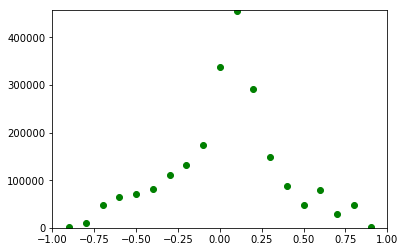

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.ion()
plt.axis([-1,1,0,max(freq)+1000])
plt.plot(k,freq,'go')
plt.show()


In [105]:
def get_target(words, idx, window_size=5):
    ''' Get a list of words in a window around an index. '''
    
    #R = np.random.randint(1, window_size+1)
    start = idx - window_size if (idx - window_size) > 0 else 0
    stop = idx + window_size if (idx + window_size < len(words)) else len(words)
    target_words = set(words[start:idx] + words[idx+1:stop+1])
    
    return list(target_words)

In [108]:
words = []
for each in abs_sentence:
    s = each.split(' ')
    words.append(s)

In [112]:
bi_grams = dict()

for each in words:
    for i in range(len(each)):
        if each[i] in bi_grams :
            bi_grams[each[i]].append(get_target(each, i, 2))
        else:
            bi_grams[each[i]] = get_target(each, i, 2)

KeyboardInterrupt: 

In [ ]:
bi_grams